# Suprise Housing Assignment Part -1

### The steps we will follow to solve this problem are:

1. Data Analysis
2. Data cleaning
3. Preparing the data for modelling
4. Model building
5. Model evaluation

#### Data Analysis 

Reading the Data 

In [1]:
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression ,Lasso, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import scipy 
from scipy.stats import pearsonr

In [2]:
df_house = pd.read_csv("C:\\Users\\vargh\\Downloads\\train.csv", na_values='NAN')

In [3]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_house.shape

(1460, 81)

The Dataframe had 1460 rows and 81 Columns

In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing Values

#### Find the % of missing values in the data frame

In [6]:
df_house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# Making a list of features with missing values
feature_NaN = [feature for feature in df_house.columns if df_house[feature].isnull().sum() > 1]

# Print the feature name and % of missing values
for feature in feature_NaN:
    print(f"{feature}: {df_house[feature].isnull().mean() * 100} % missing")


LotFrontage: 17.73972602739726 % missing
Alley: 93.76712328767123 % missing
MasVnrType: 0.547945205479452 % missing
MasVnrArea: 0.547945205479452 % missing
BsmtQual: 2.5342465753424657 % missing
BsmtCond: 2.5342465753424657 % missing
BsmtExposure: 2.6027397260273974 % missing
BsmtFinType1: 2.5342465753424657 % missing
BsmtFinType2: 2.6027397260273974 % missing
FireplaceQu: 47.26027397260274 % missing
GarageType: 5.5479452054794525 % missing
GarageYrBlt: 5.5479452054794525 % missing
GarageFinish: 5.5479452054794525 % missing
GarageQual: 5.5479452054794525 % missing
GarageCond: 5.5479452054794525 % missing
PoolQC: 99.52054794520548 % missing
Fence: 80.75342465753424 % missing
MiscFeature: 96.30136986301369 % missing


##### we see lot of missing values in the features. 


There is relation between the missing value and SalesPrice , so we need to replace all the NAN value accordingly 

#### Data Cleaning 

### Replacing the Null values with appropriate values 
When we check the data dictionary provided , most of the coluuns NA signifiy some value 

In [8]:
null_features_val = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType","MasVnrType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [9]:
for val in null_features_val:
    df_house[val].fillna('None',inplace= True)


In [10]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df_house[feature_NaN].isnull().sum()

LotFrontage     259
Alley             0
MasVnrType        0
MasVnrArea        8
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageQual        0
GarageCond        0
PoolQC            0
Fence             0
MiscFeature       0
dtype: int64

FOr the Numerical Missing value , replace it with Median

In [12]:
df_house.LotFrontage.fillna(df_house.LotFrontage.median(), inplace =True)
df_house.MasVnrArea.fillna(df_house.MasVnrArea.median(),inplace = True)
df_house.GarageYrBlt.fillna(df_house.GarageYrBlt.median(), inplace= True)

In [13]:
# Check the Null values again 

df_house[feature_NaN].isnull().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

## EDA

Segreate the Numerical , Datetime and Catagorial features

In [14]:
num_col = [num_val for num_val in df_house.columns if df_house[num_val].dtypes != 'O']

df_house[num_col].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
# Datetime 
yr_feature = [y for y in num_col if 'Yr' in y or 'Year' in y]

yr_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Compare the year feature after it was sold with the SalesPrice

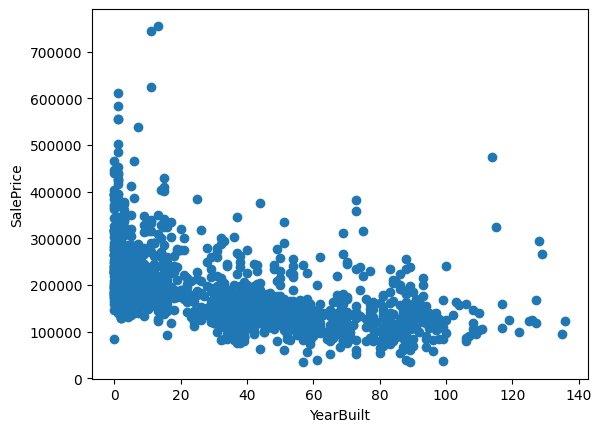

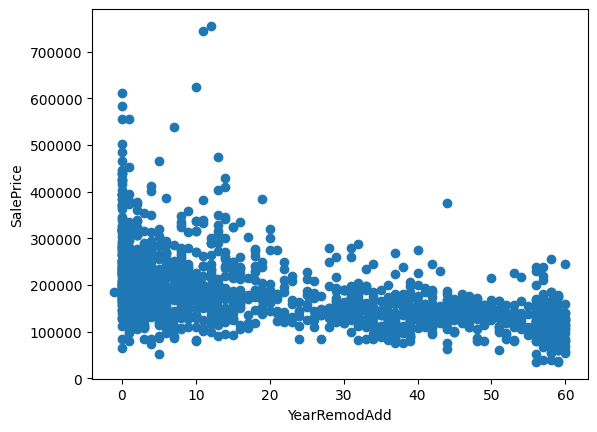

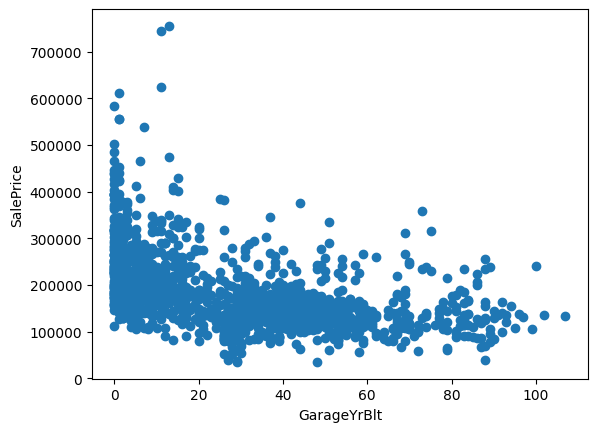

In [16]:
for y in yr_feature:
    if y!='YrSold':
        data = df_house.copy()
        # diff between the other year feature and year house was sold
        data[y]=data['YrSold']-data[y]
        
        plt.scatter(data[y],data['SalePrice'])
        plt.xlabel(y)
        plt.ylabel('SalePrice')
        plt.show()


We are see a clear relation the Year features and Sales Price 
We see a increase in Saleprice when the house built, remodled and Garage Built is more recent 
as  year iincrease the sameprice also decreases

There are some Discrete variables in the Lets evalute them with the sales price 

In [17]:
discrete_feature=[col for col  in num_col if len(df_house[col].unique())< 25 and col not in yr_feature+['Id']] # 25 taken as random number after checking the values in teh data dictionary

In [18]:
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [19]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

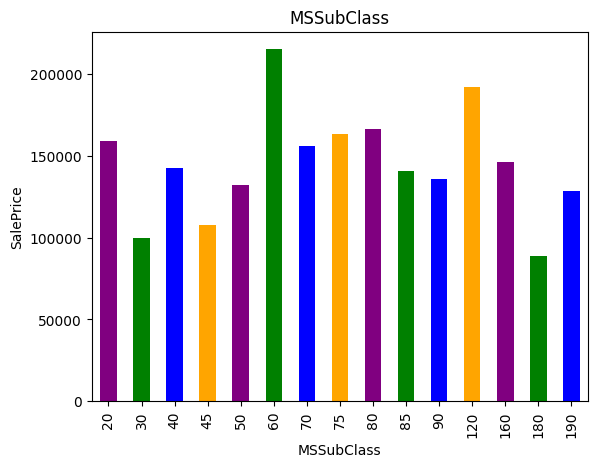

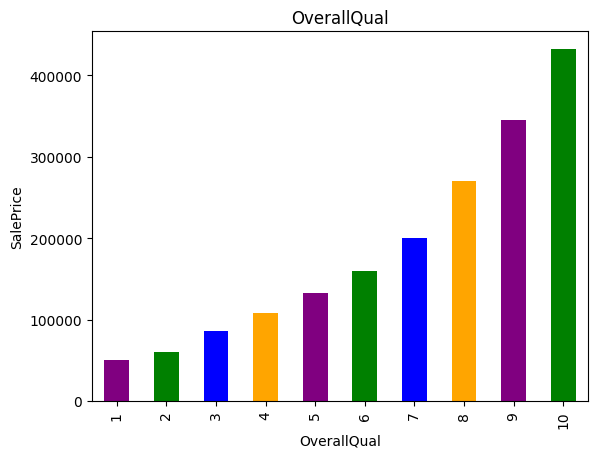

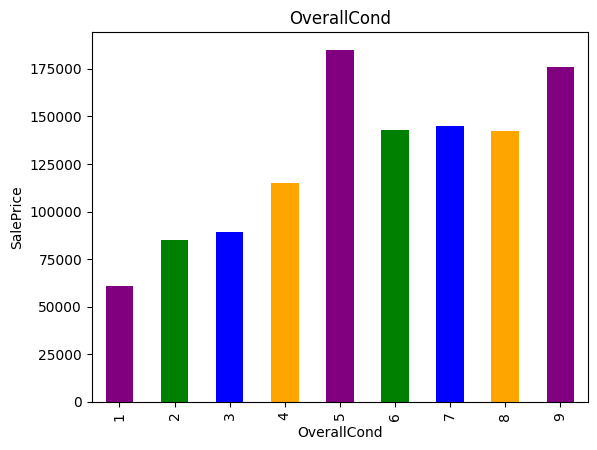

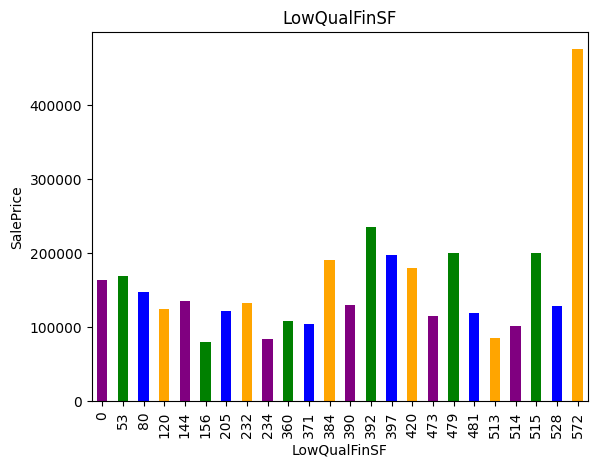

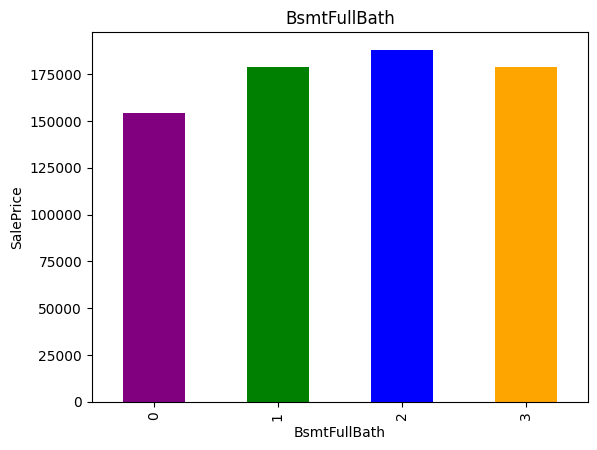

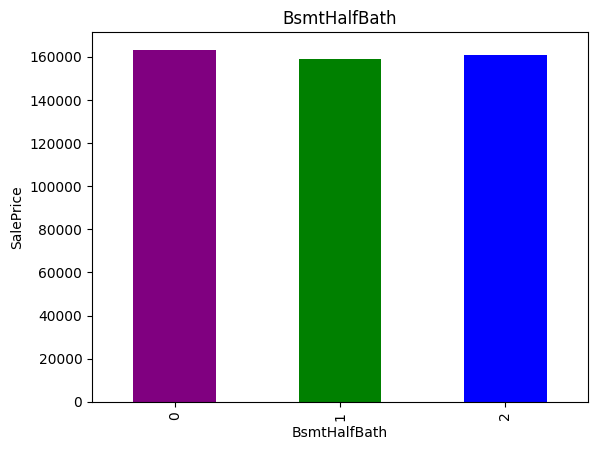

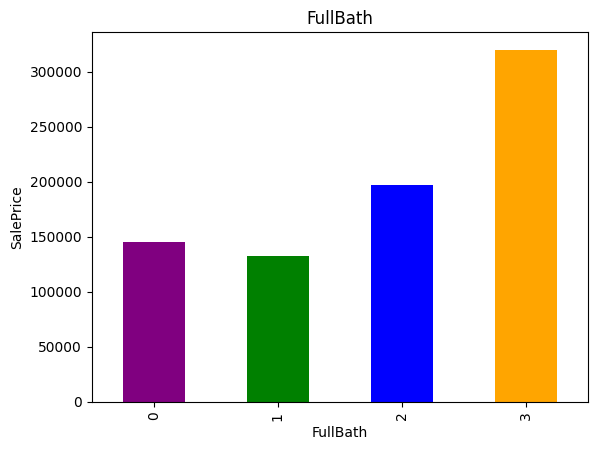

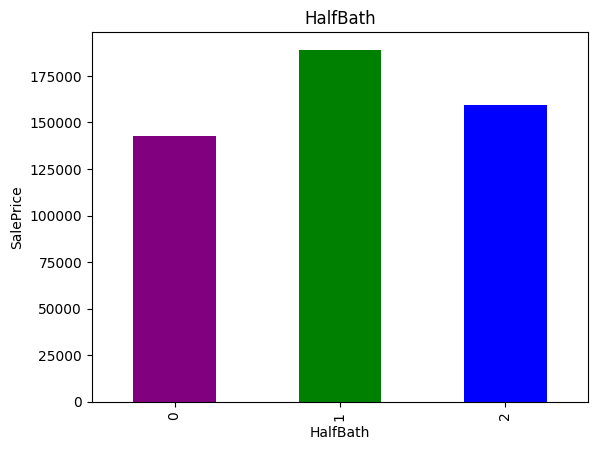

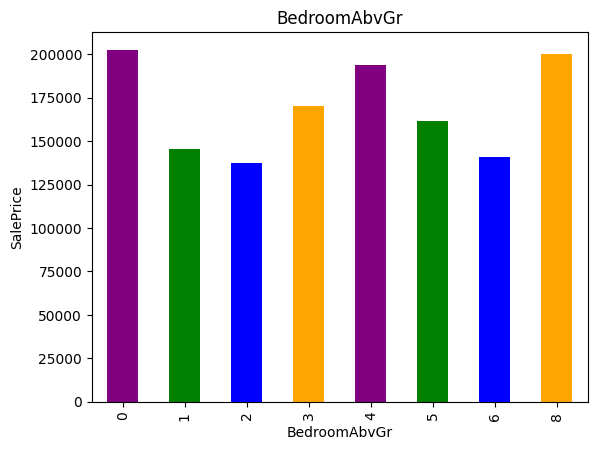

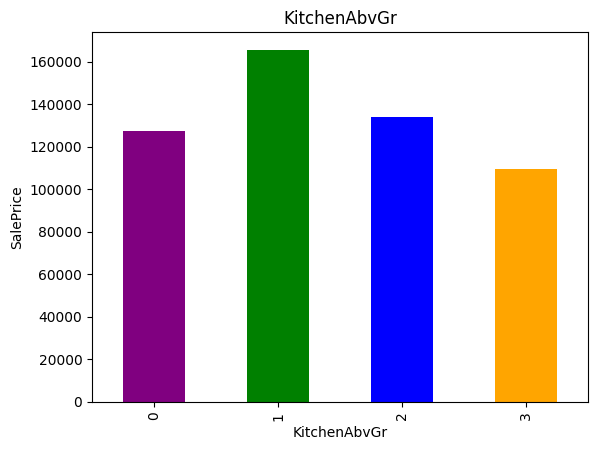

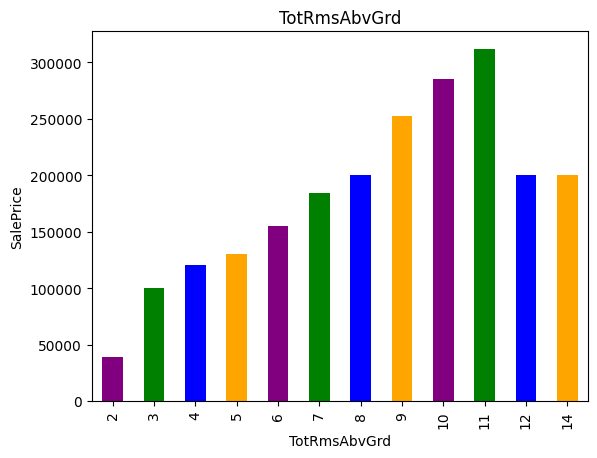

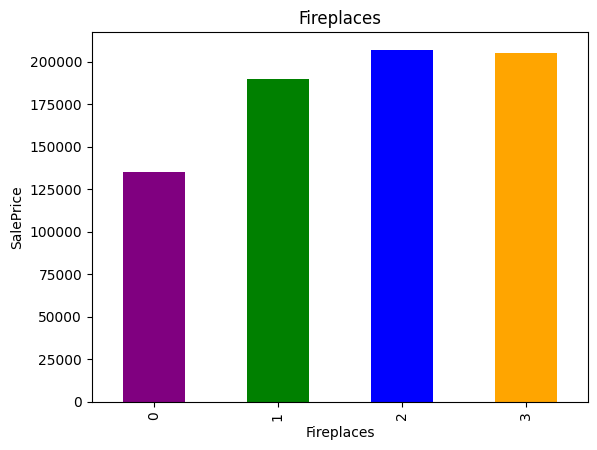

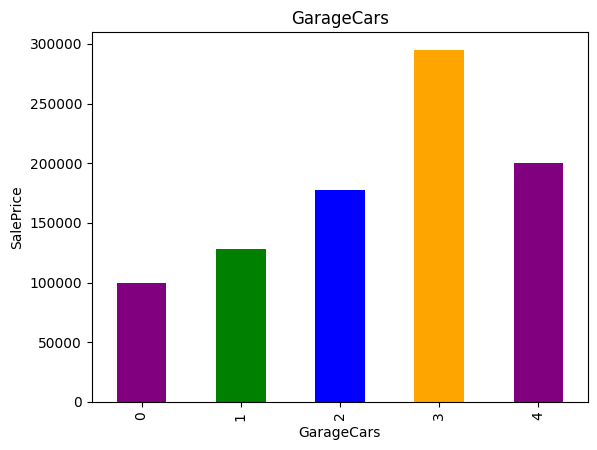

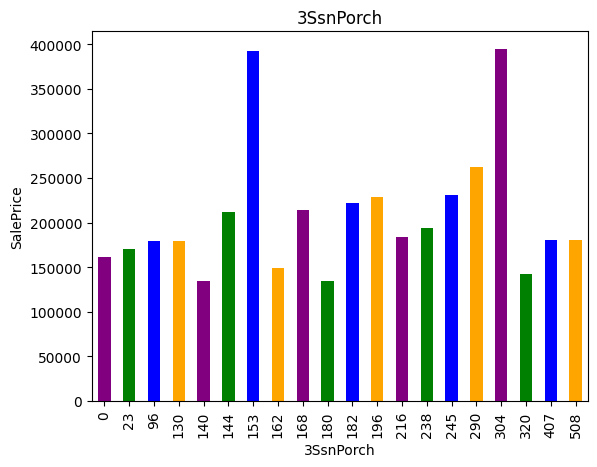

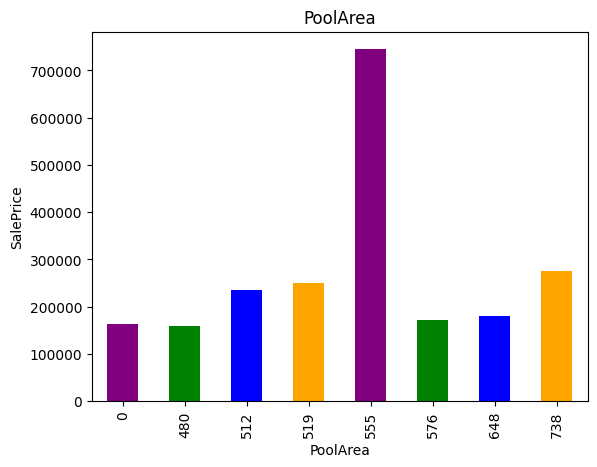

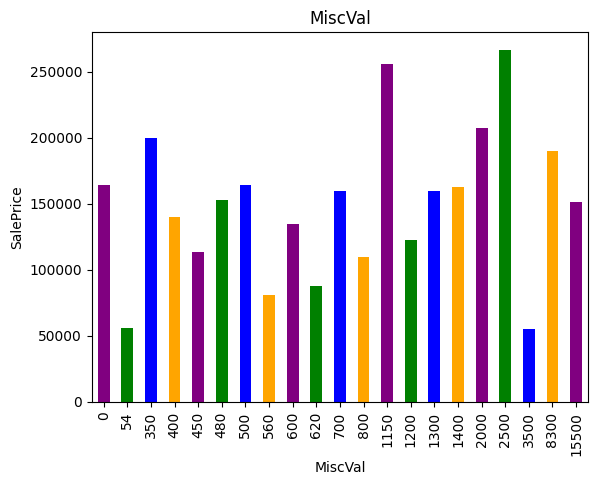

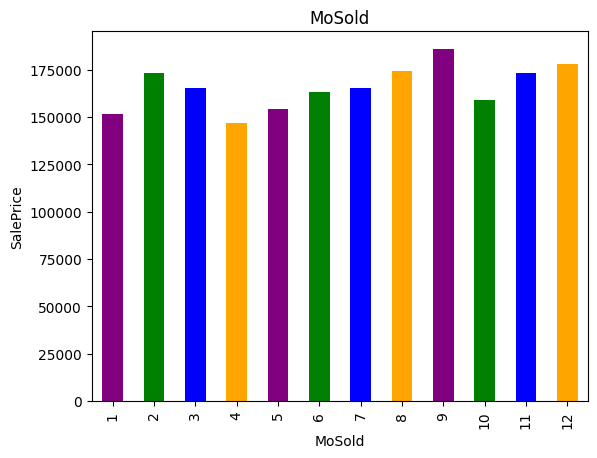

In [20]:
for col in discrete_feature:
    data = df_house.copy()
    groups = data.groupby(col)['SalePrice'].median()
    bars = groups.plot.bar(color=['Purple', 'green', 'blue', 'orange'])  # Specify colors for each bar
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

    

We see some of the Descrete columns like OverallQual Sales prices increase with increase in value  

The few Columns does not have impact on the Sales Price, we can drop them 
MoSold,KitchednAbvGr, bedroomAbGr,BsmtHalfBath, HalfBath,BSmtHalfBath, BSmtFullbath


In [21]:
df_house.drop(["MoSold","HalfBath","BsmtHalfBath","BedroomAbvGr","KitchenAbvGr",'BsmtFullBath'], axis=1,inplace =True)

In [22]:
df_house.shape

(1460, 75)

#####  Continous features

In [23]:
continous_features =[col for col  in num_col if col not in discrete_feature+yr_feature+['Id']]

In [24]:
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

Plot the continous columns

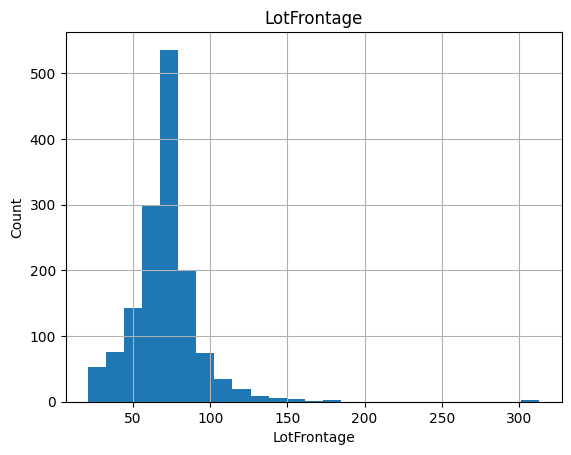

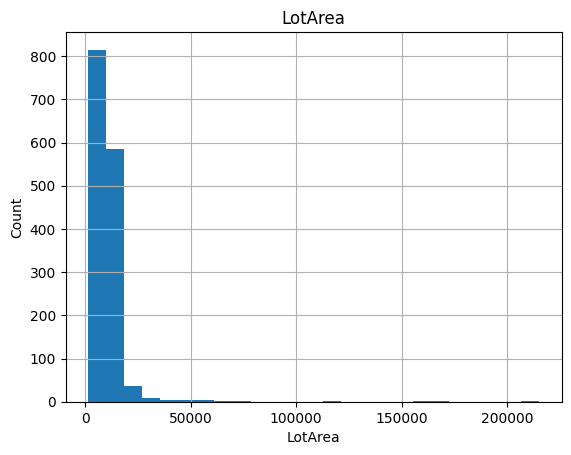

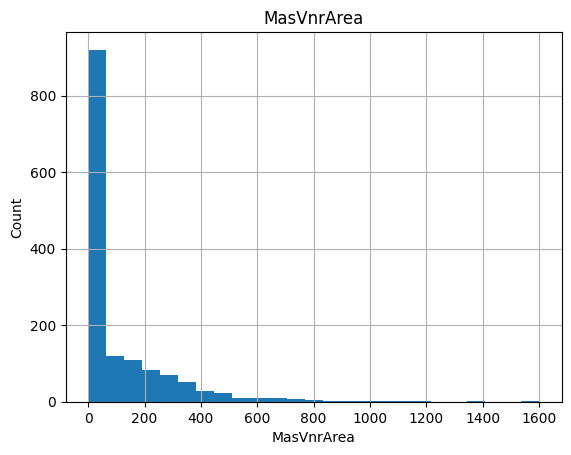

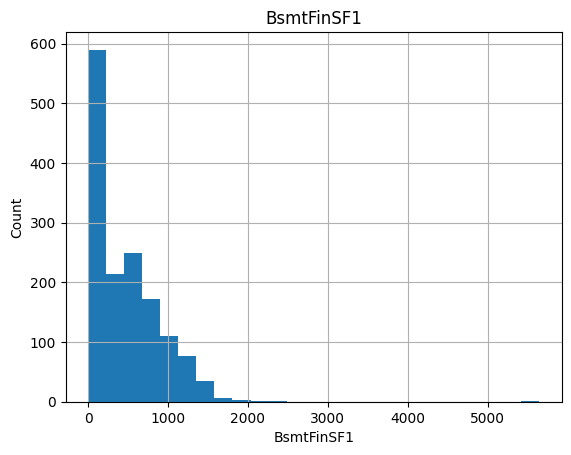

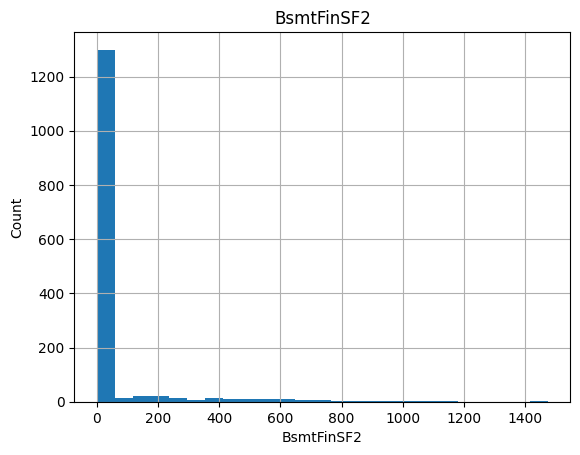

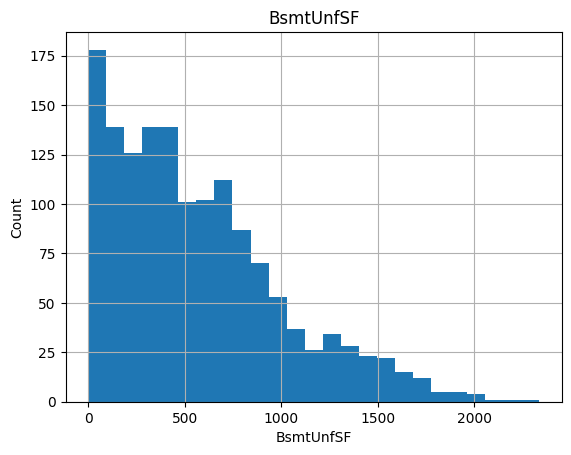

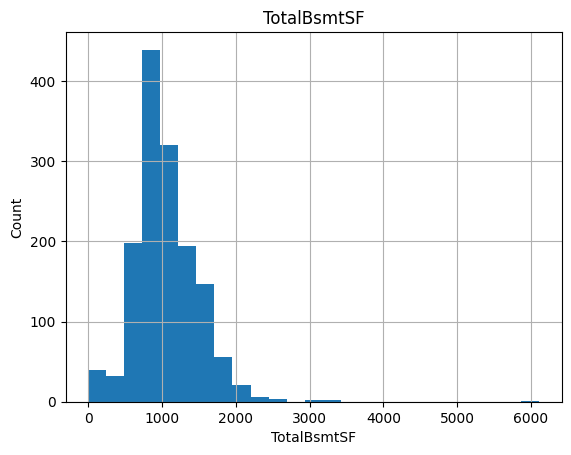

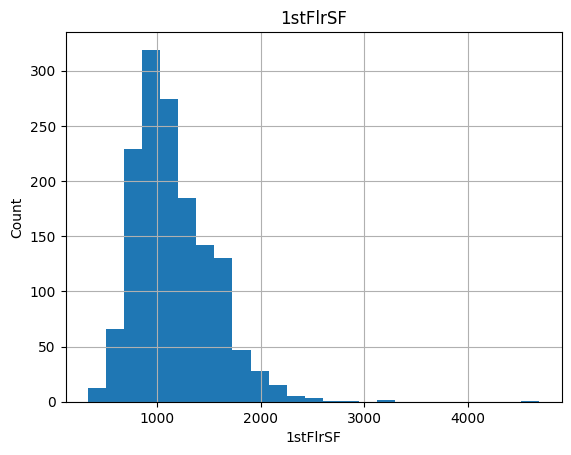

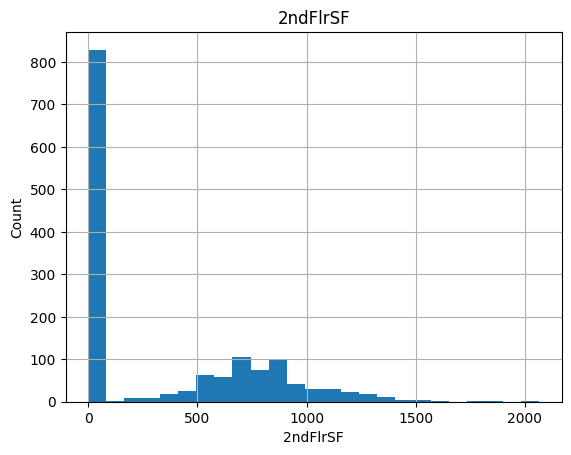

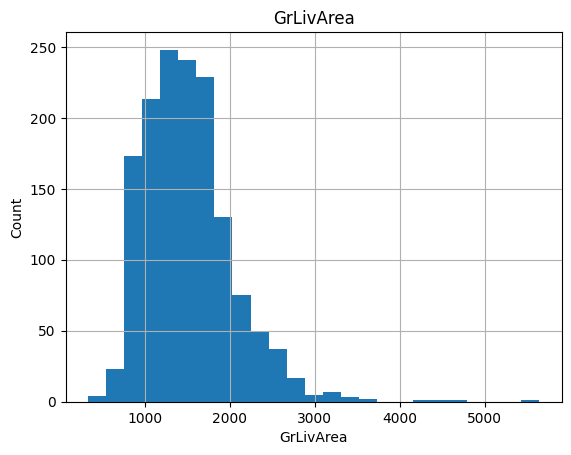

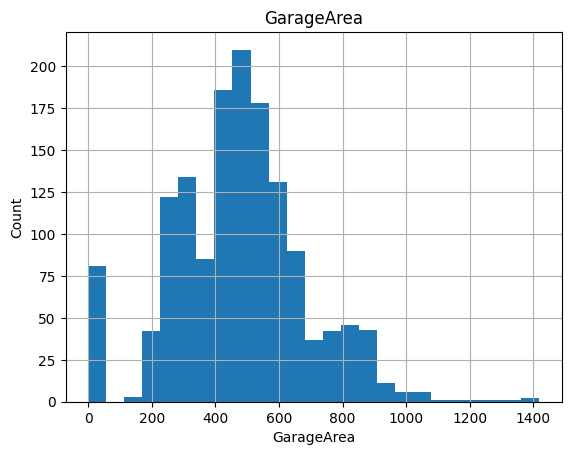

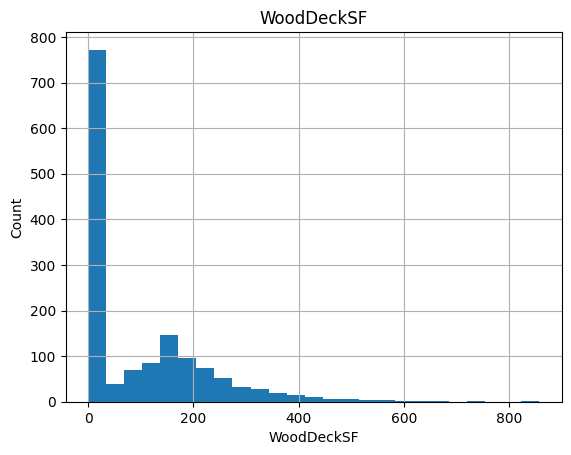

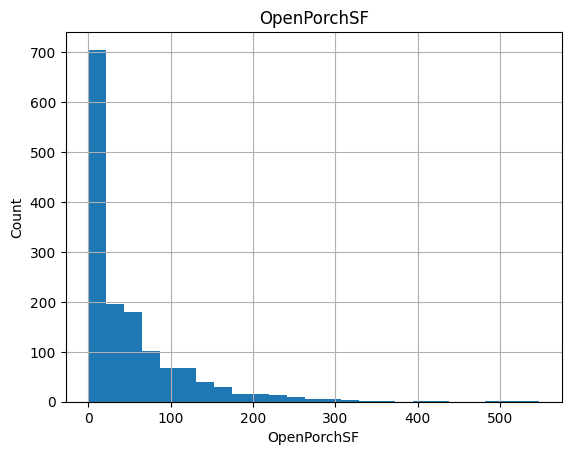

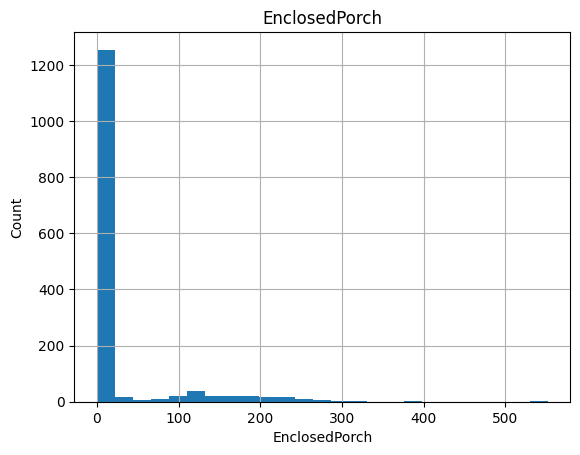

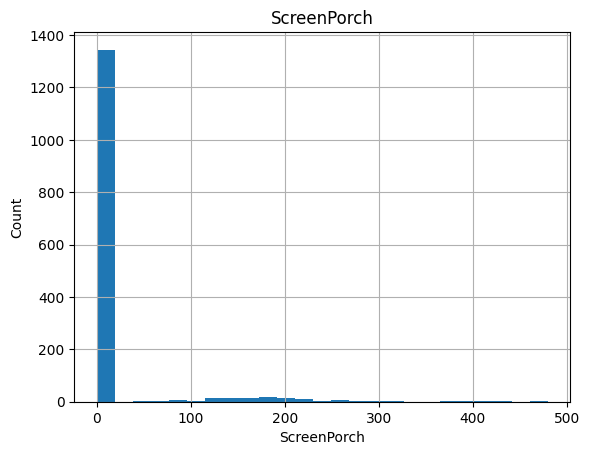

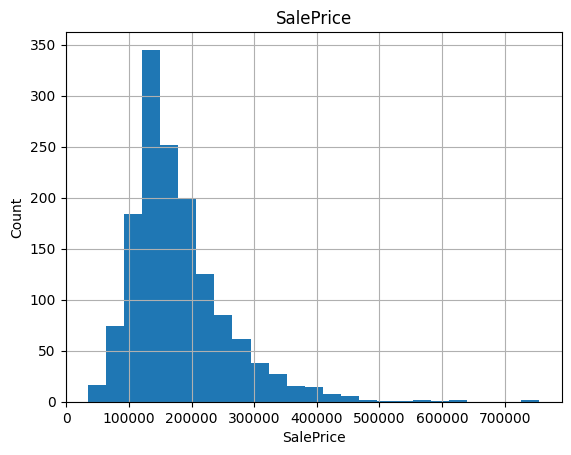

In [25]:
for col in continous_features:
    data=df_house.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

We see high skewedness in few columns , so dropping them 

In [26]:
df_house.drop(['BsmtFinSF2','MasVnrArea','BsmtUnfSF',  '2ndFlrSF', 'EnclosedPorch', 'ScreenPorch','OpenPorchSF','WoodDeckSF'],axis=1,inplace=True)

In [27]:
df_house.shape

(1460, 67)

Identify outliers 

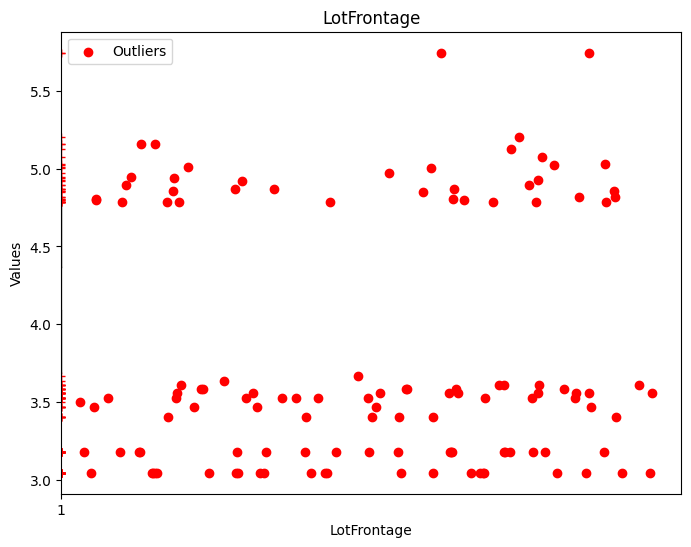

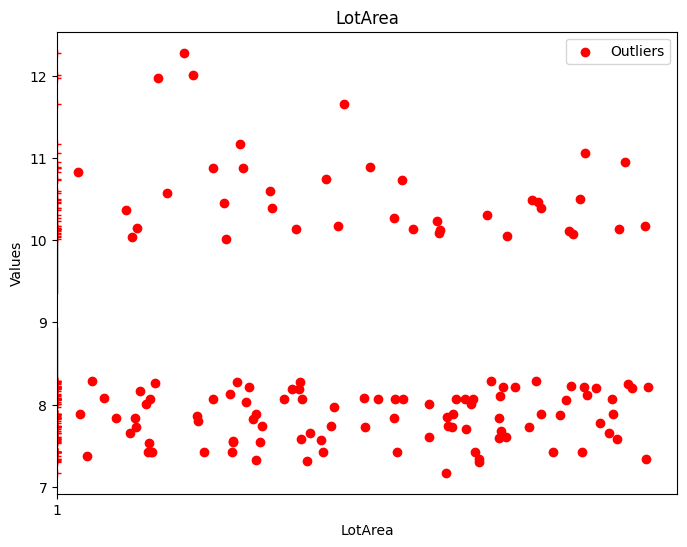

KeyError: 'MasVnrArea'

In [28]:

def identify_outliers_iqr(data, feature):
    # Calculate the IQR
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    return outliers

for feature in continous_features:
    data = df_house.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])

        # Identify outliers using IQR method
        outliers = identify_outliers_iqr(data, feature)

        # Create a boxplot with outliers highlighted
        plt.figure(figsize=(8, 6))
        plt.boxplot(data[feature], notch=True, sym='r+')
        plt.scatter(outliers.index, outliers[feature], c='red', marker='o', label='Outliers')
        plt.xlabel(feature)
        plt.ylabel('Values')
        plt.title(feature)
        plt.legend()
        plt.show()


Too many outliers oberserved in LotFrontage and it have null values which we had imputed 

In [29]:
df_house.drop("LotFrontage",axis =1 , inplace =True)

In [30]:
df_house.shape

(1460, 66)

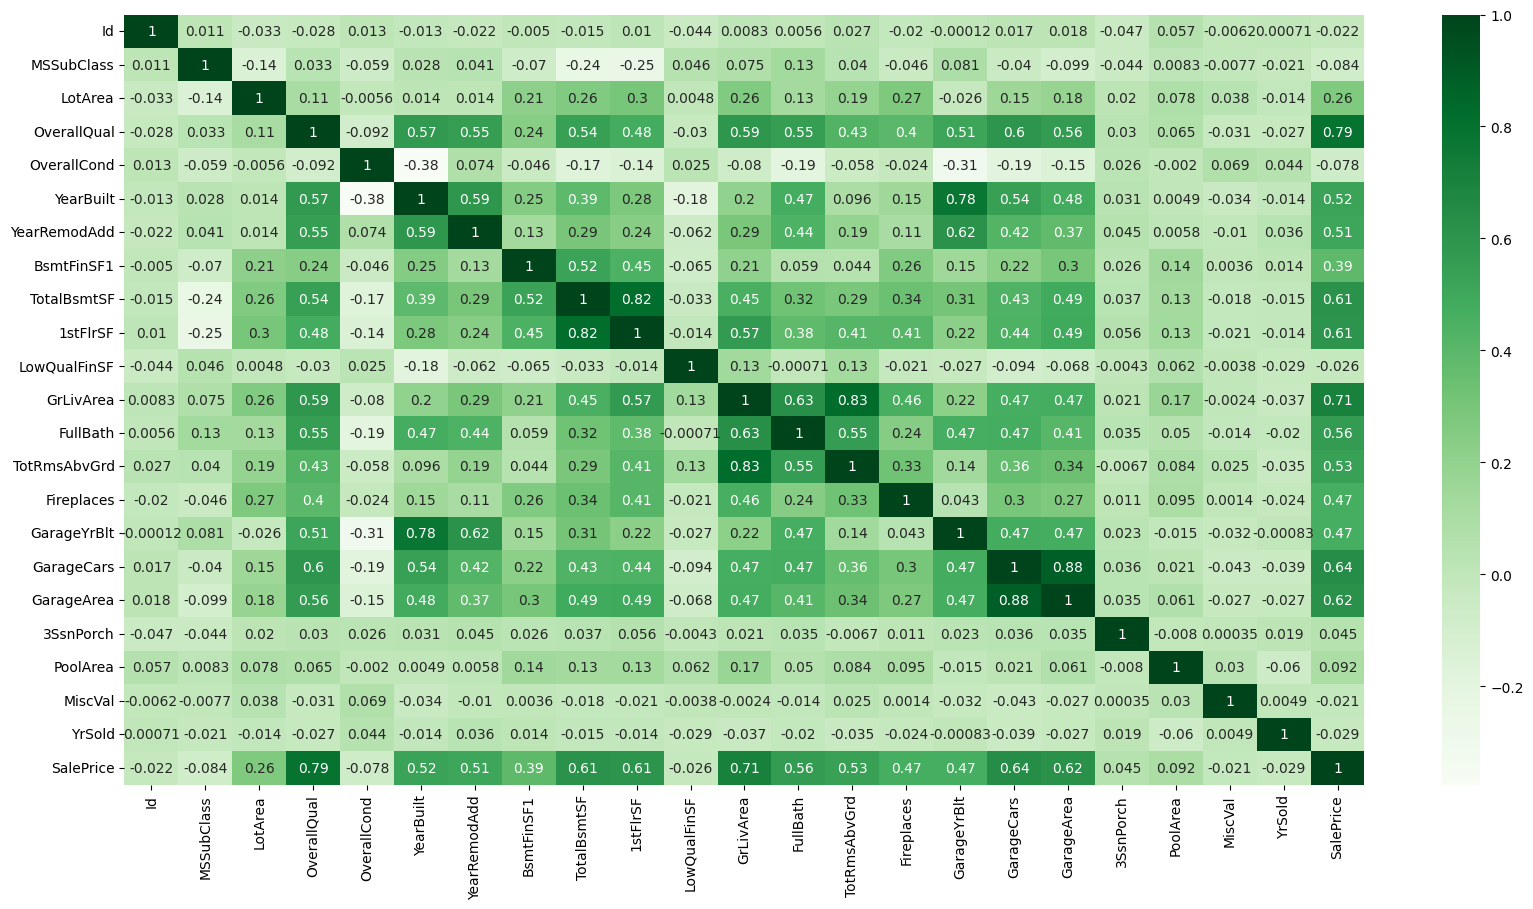

In [31]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_house.corr(), annot = True, cmap="Greens")
plt.show()


Removing following columns which shows high correlation

TotRmsAbvGrd and GrLivArea show 83%
Garage Area and Garage Cars show 88%

In [32]:
df_house.drop(['TotRmsAbvGrd','GarageCars'],axis =1 , inplace =True)

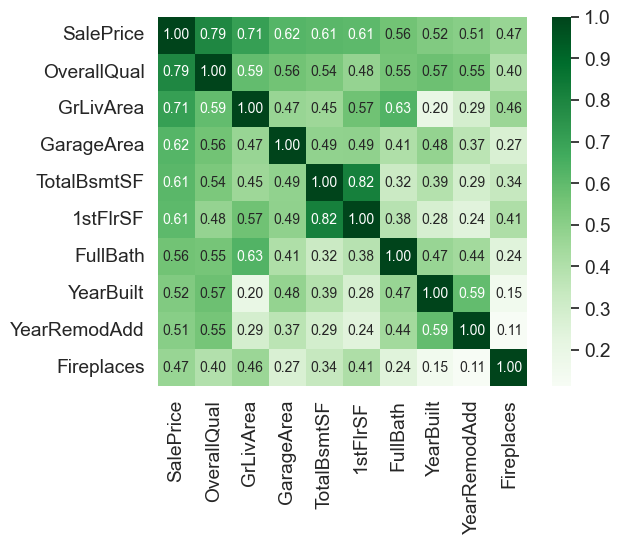

In [33]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = df_house.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap="Greens")
plt.show()

### Categorical Variables 

In [34]:
categorical_var=[col for col in df_house.columns if df_house[col].dtypes=='O']
categorical_var

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

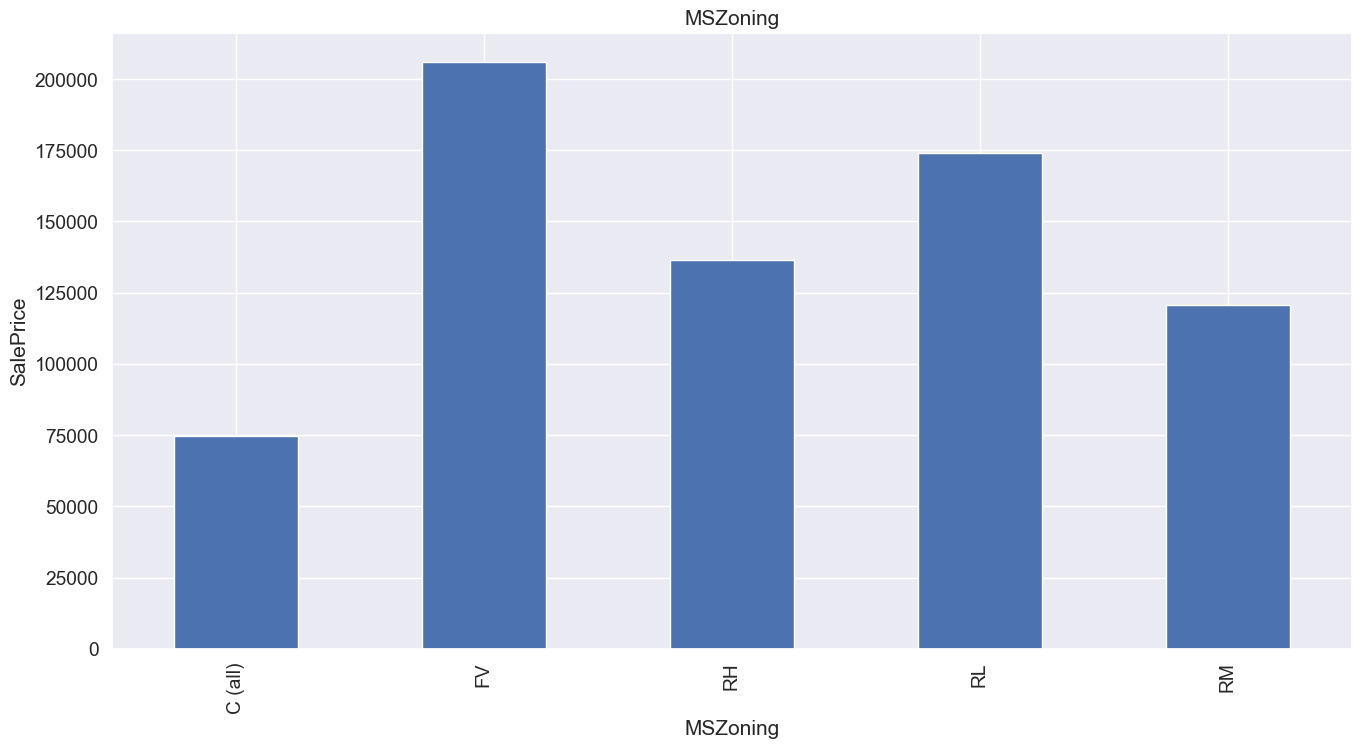

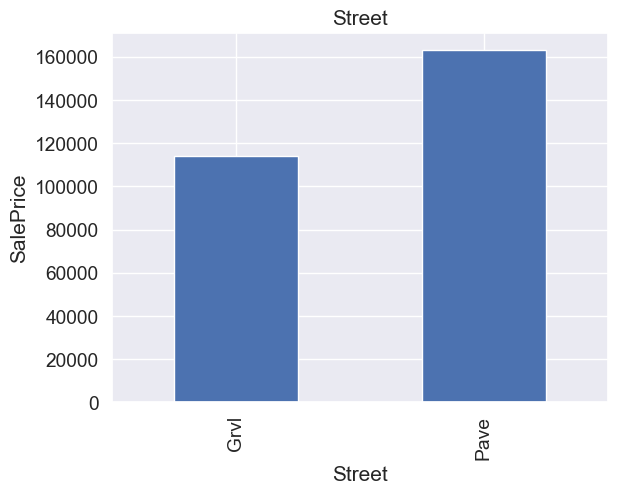

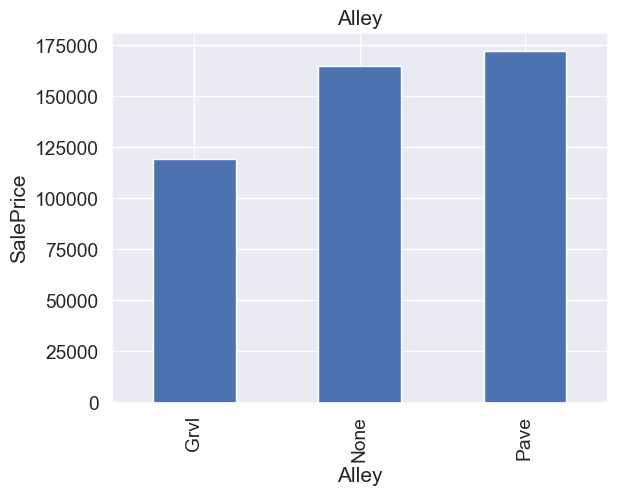

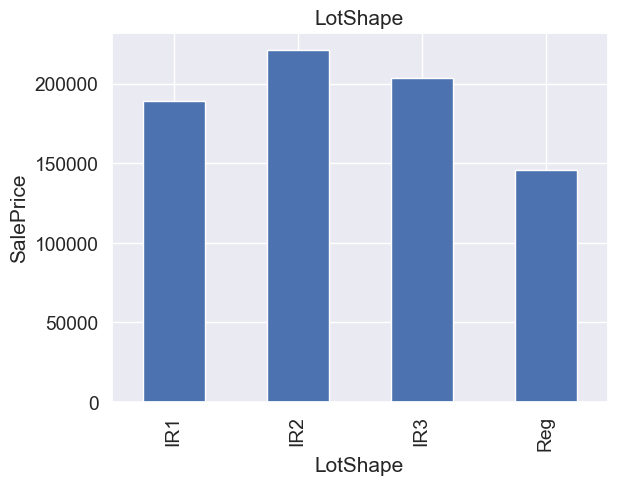

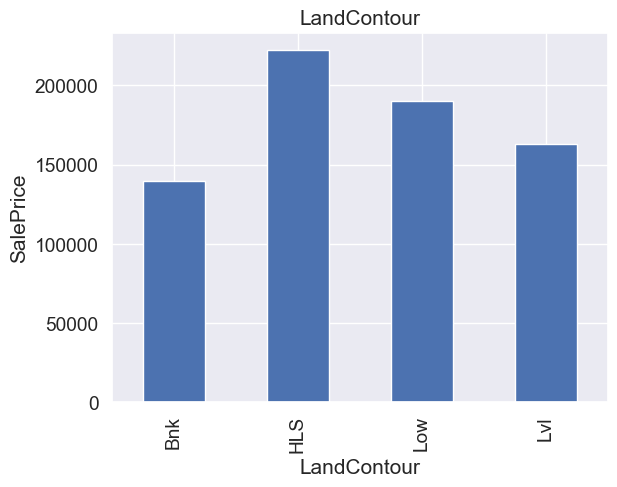

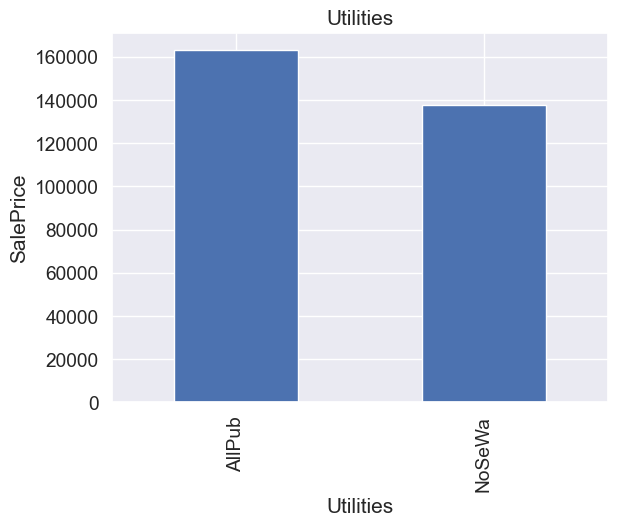

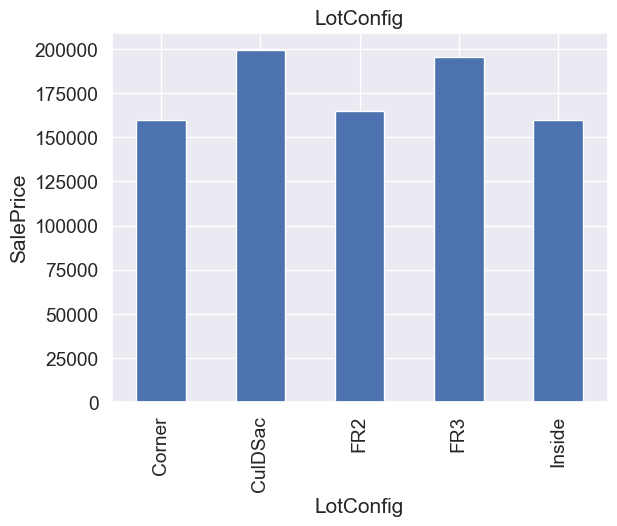

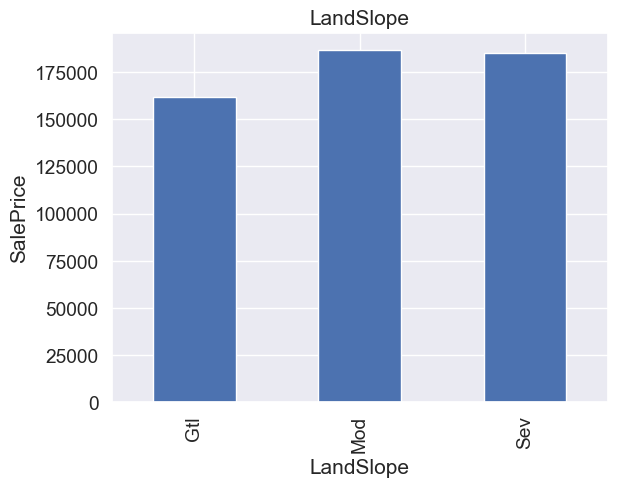

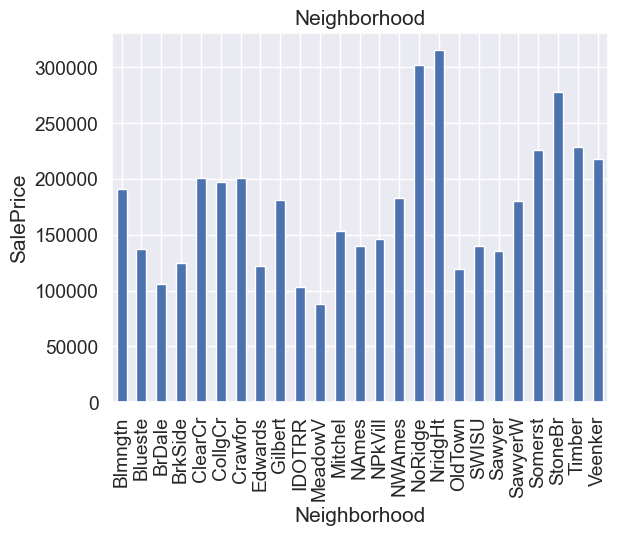

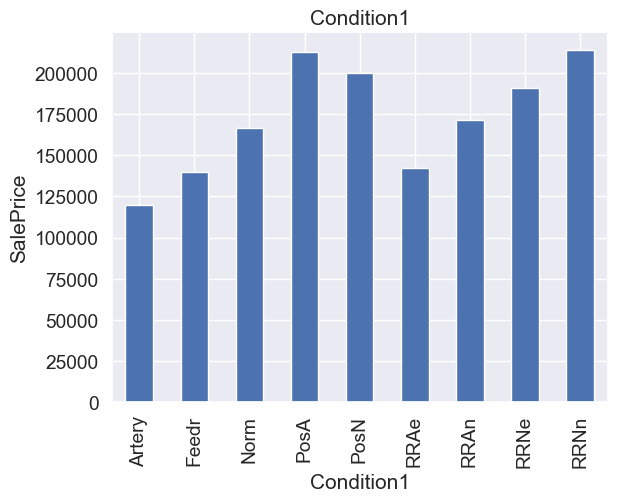

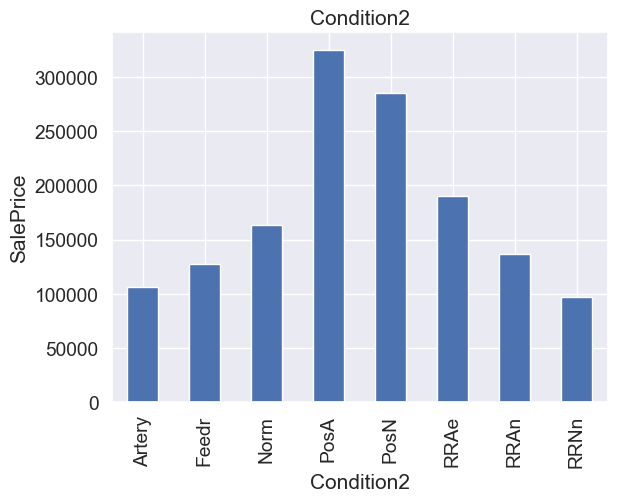

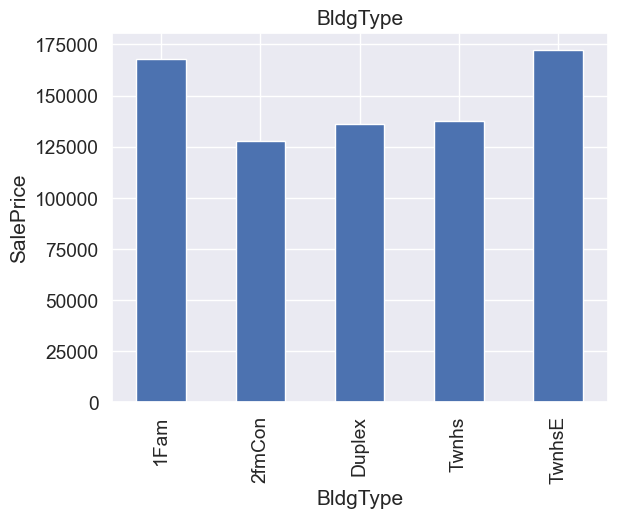

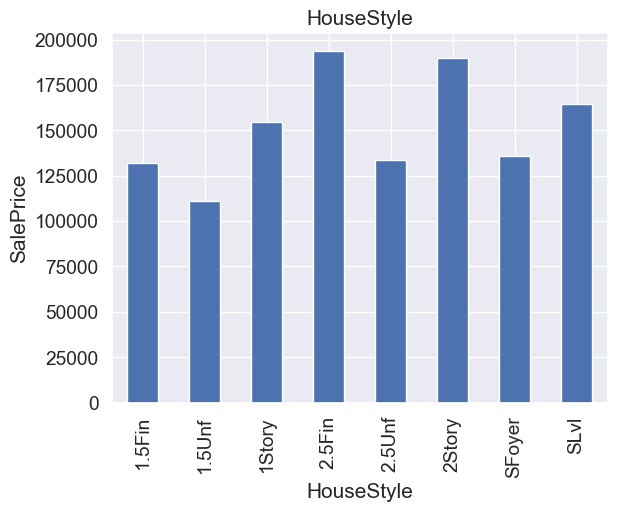

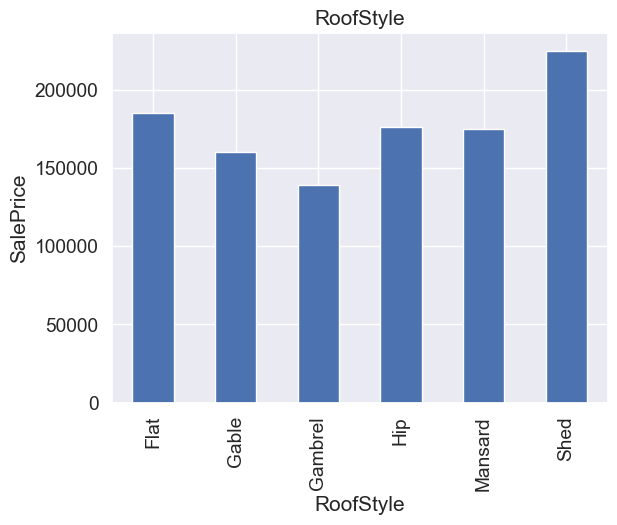

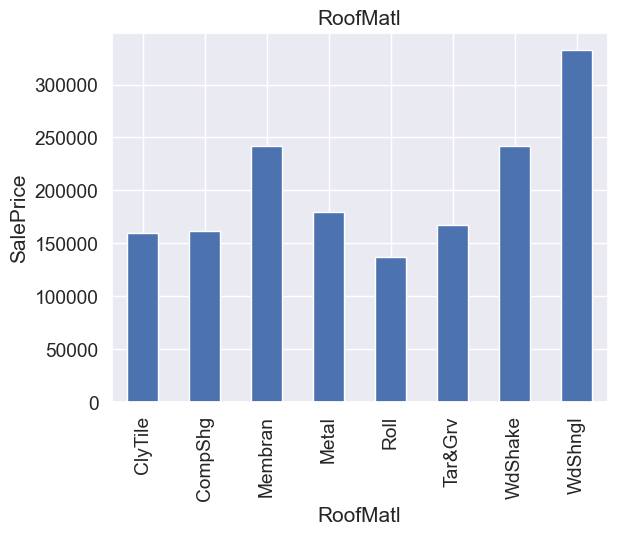

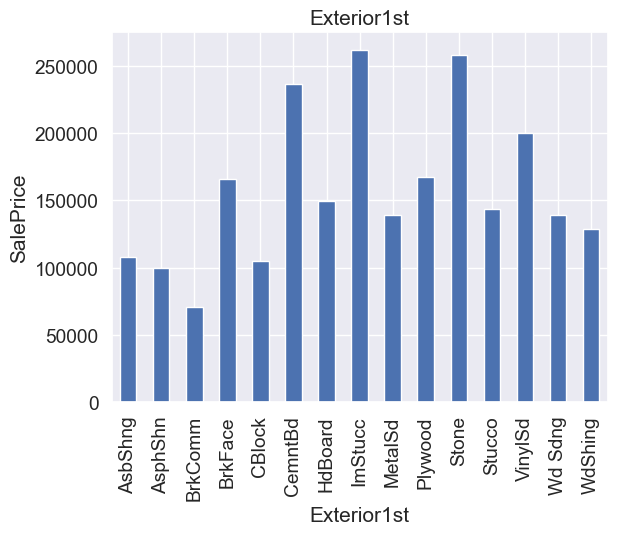

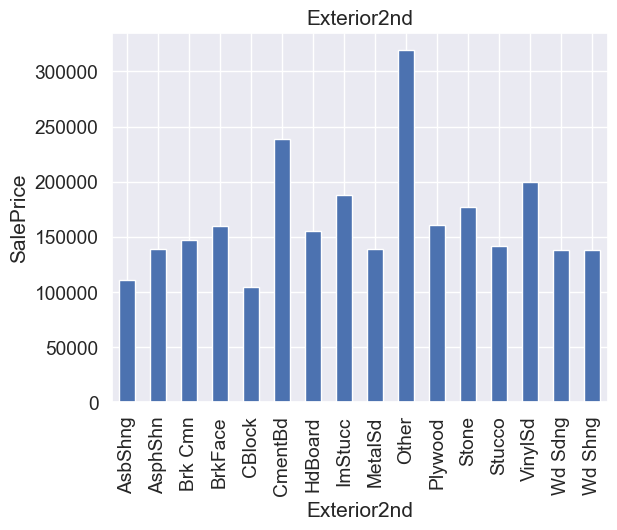

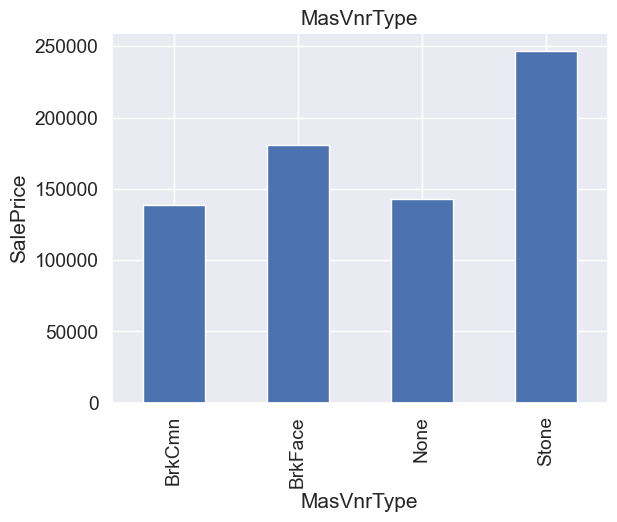

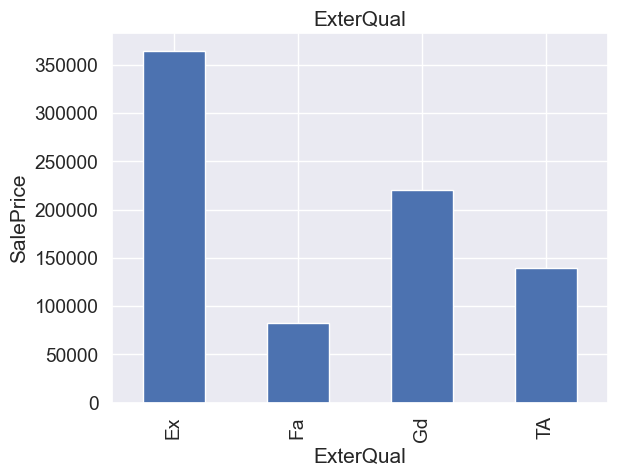

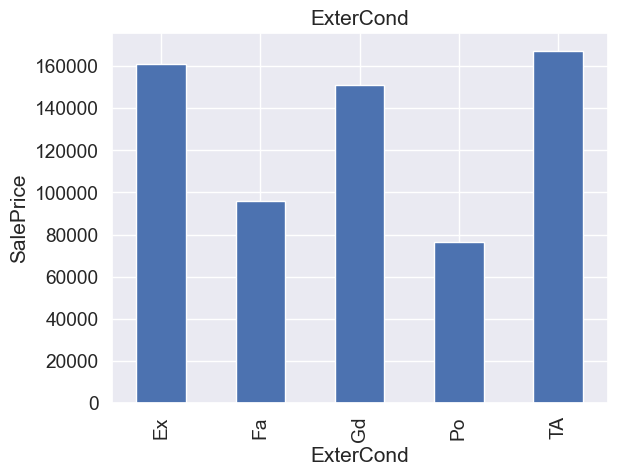

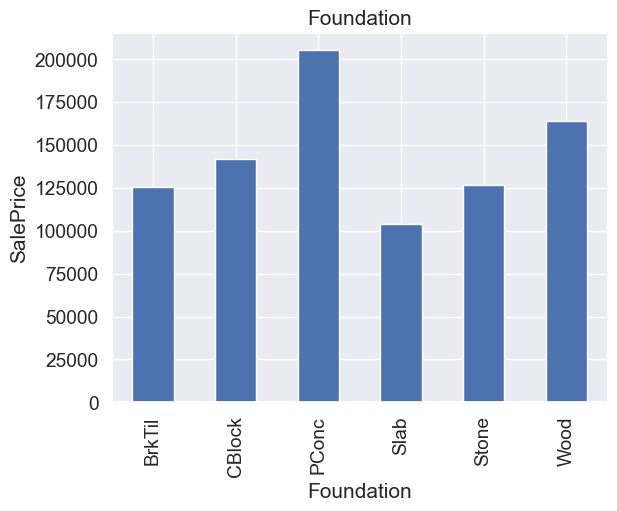

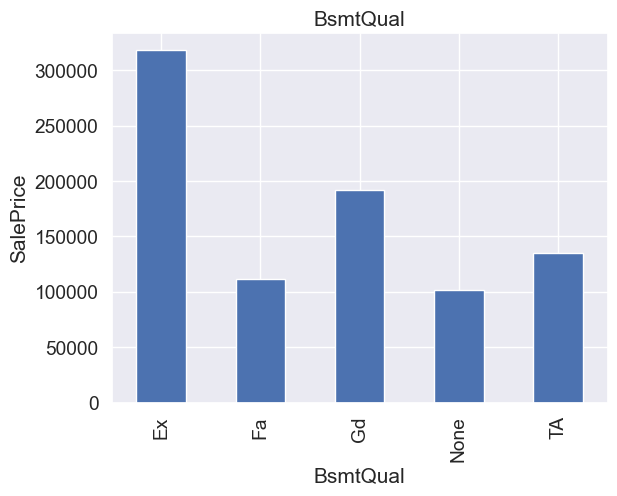

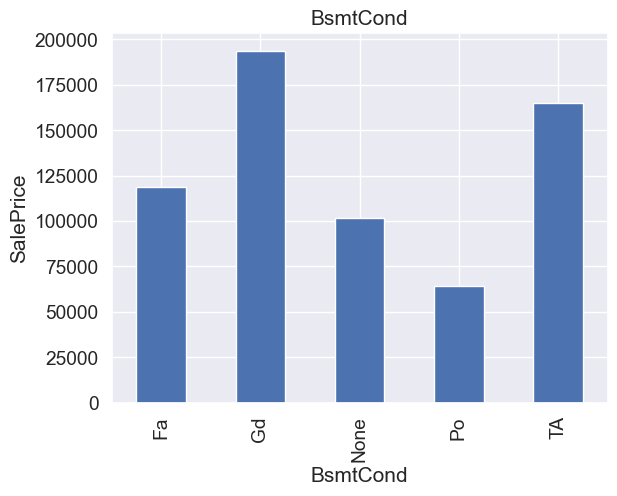

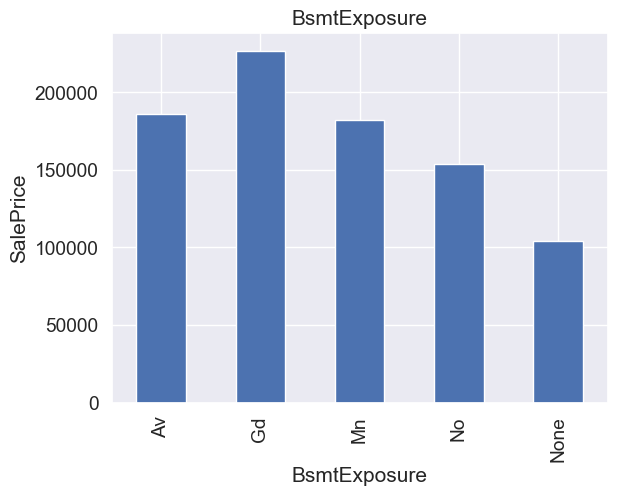

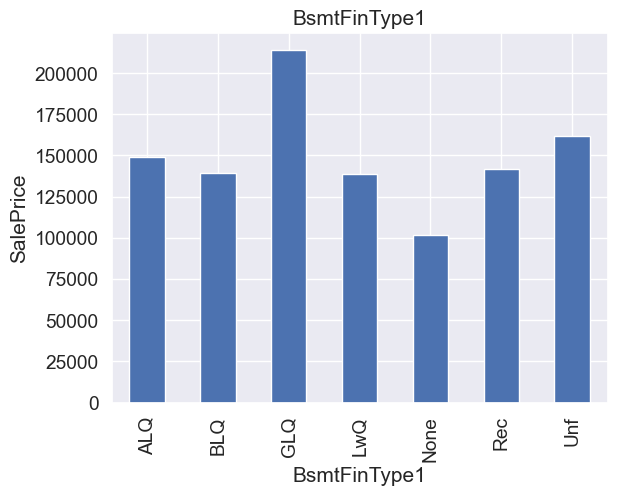

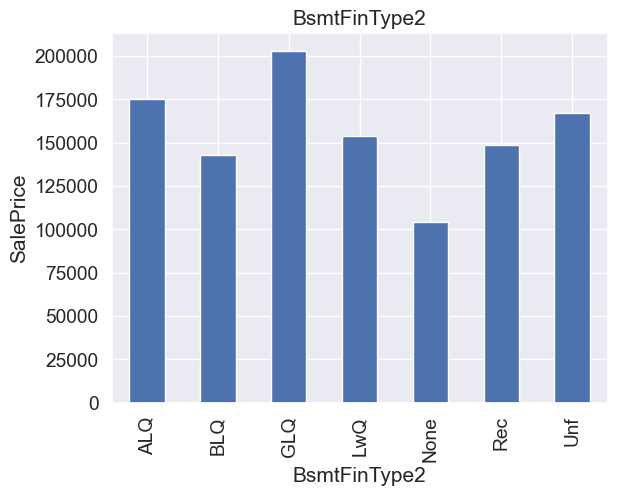

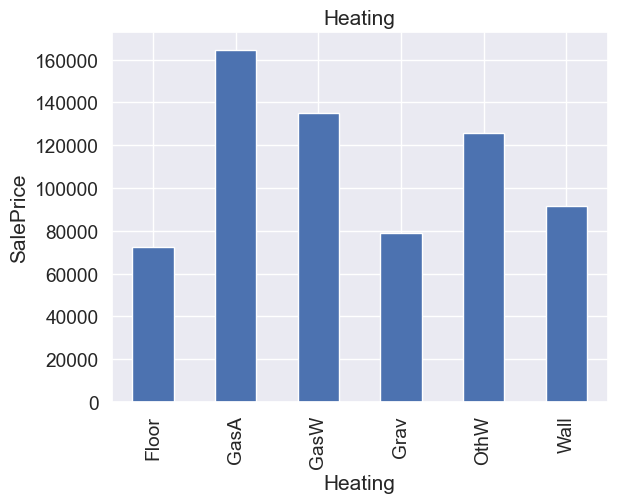

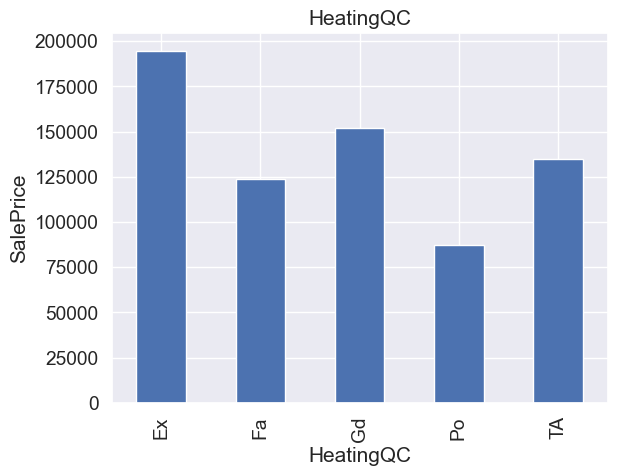

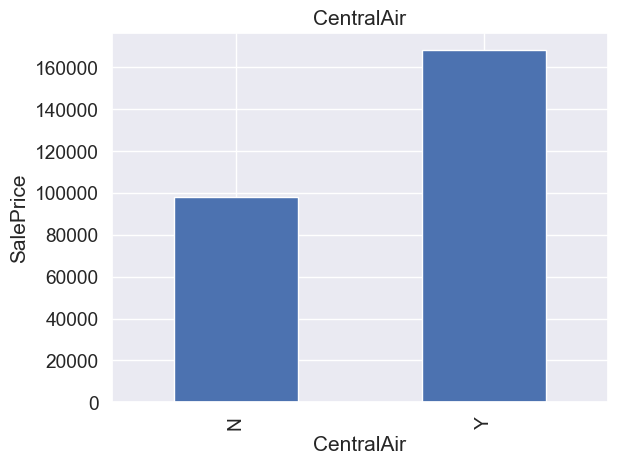

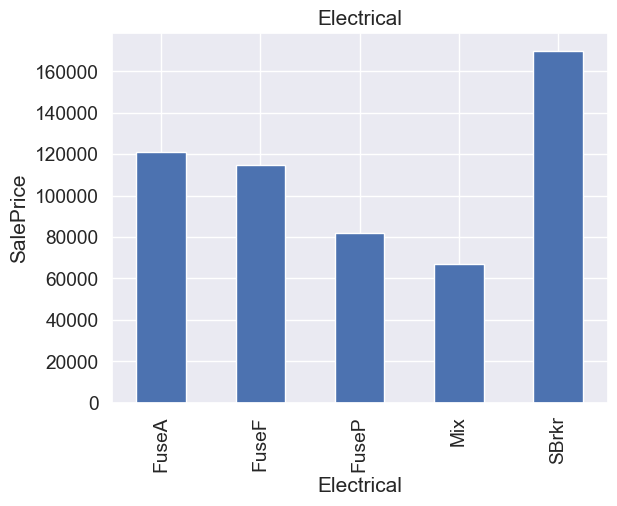

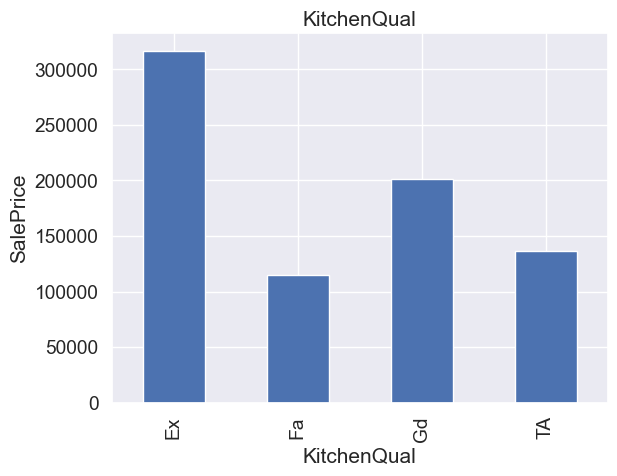

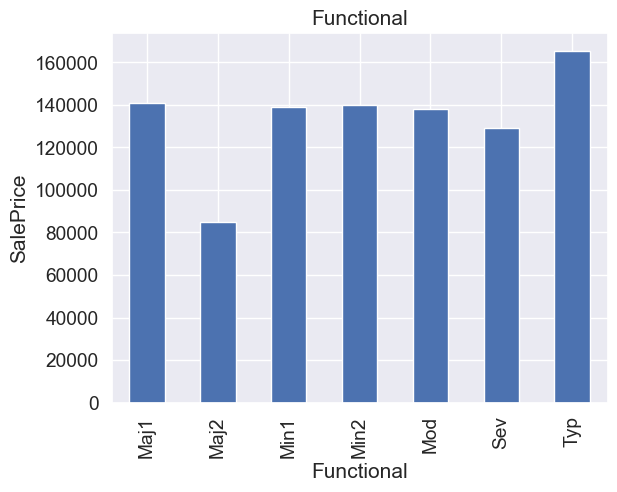

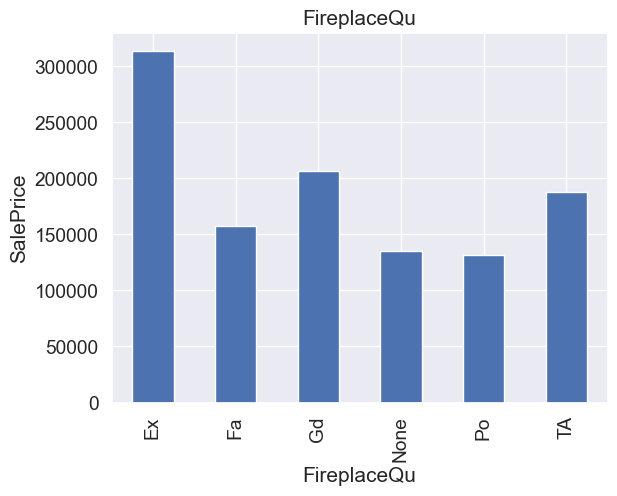

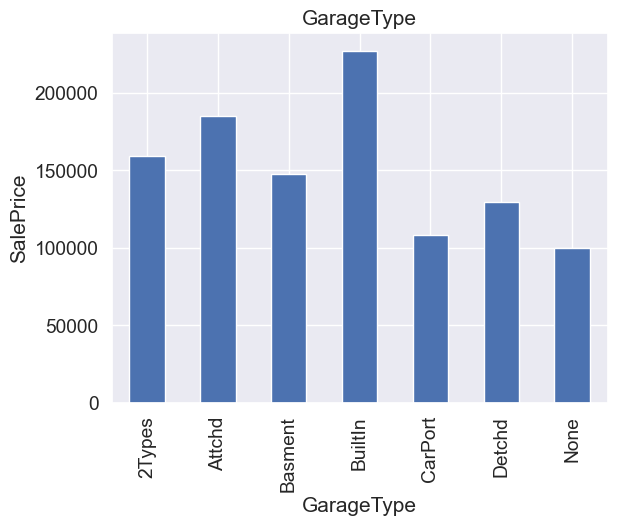

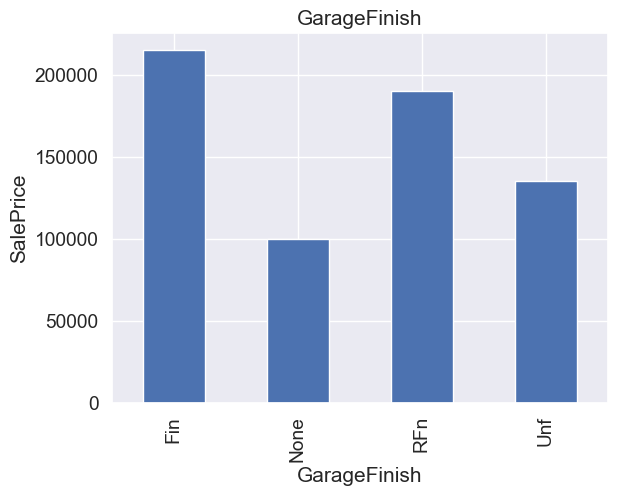

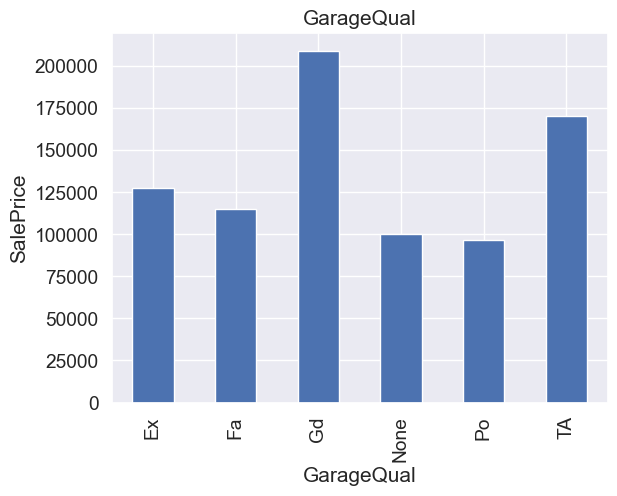

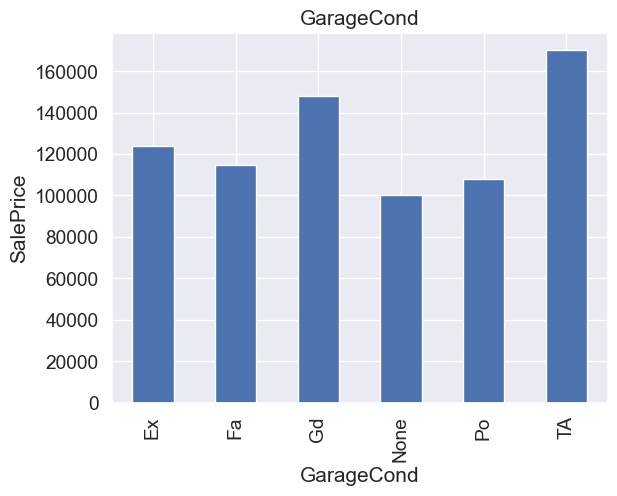

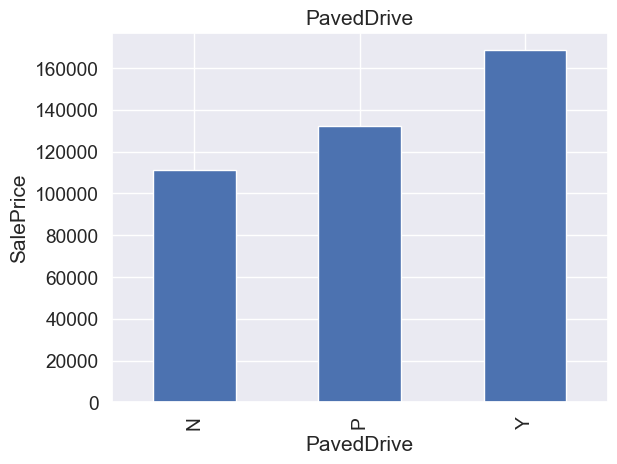

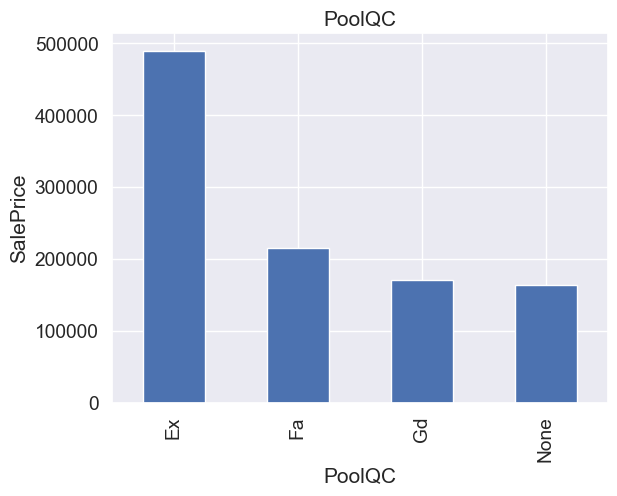

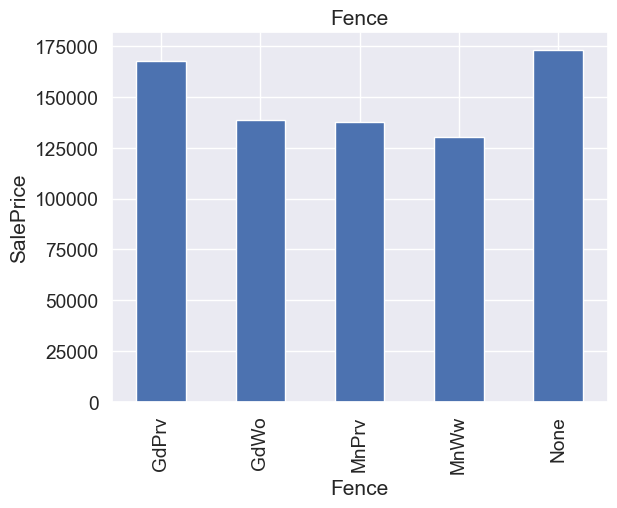

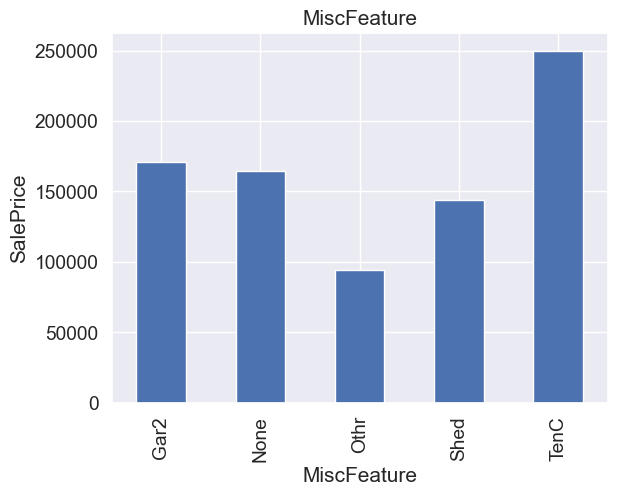

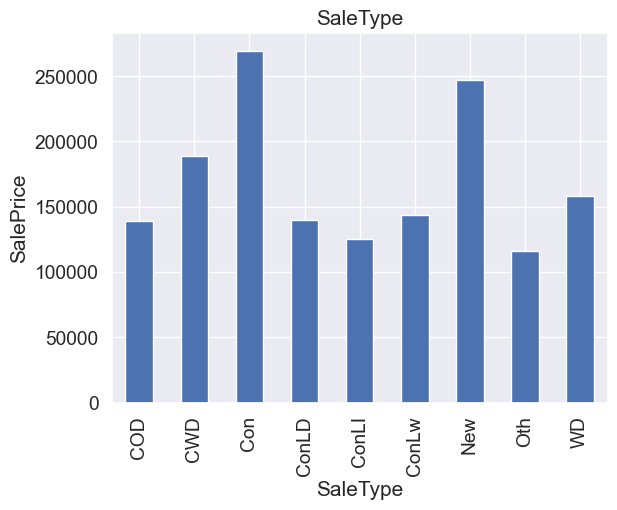

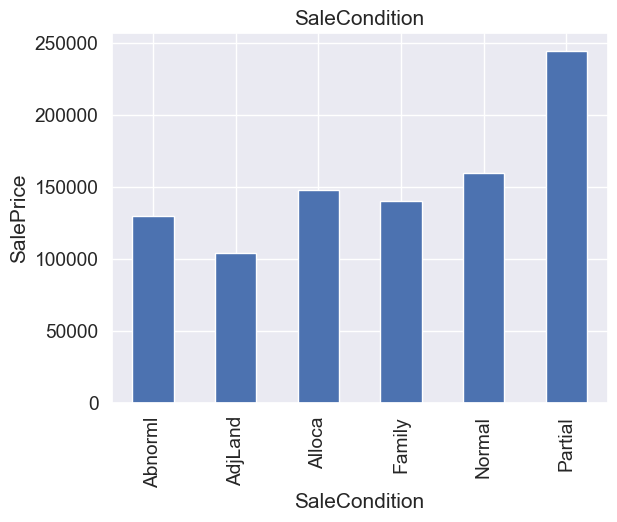

In [35]:
plt.figure(figsize=(16, 8))
for var in categorical_var:
    data=df_house.copy()
    data.groupby(var)['SalePrice'].median().plot.bar()
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.title(var)
    plt.show()

Drop the columns which does much influence on the sales price much

In [36]:
Col_Drop = ['SaleCondition','SaleType','MiscFeature', 'Fence', 'Functional', 'Electrical', 'BsmtFinType2','RoofStyle', 'HouseStyle', 'BldgType', 'Condition1',
'LandSlope', 'LotConfig', 'Utilities', 'LandContour', 'LotShape','Alley', 'Street','Heating','BsmtExposure']

In [37]:

df_house.drop(Col_Drop, axis =1, inplace= True)

In [38]:
df_house.shape

(1460, 44)

In [39]:
new_cat_col=[col for col in df_house.columns if df_house[col].dtypes=='O']
new_cat_col

['MSZoning',
 'Neighborhood',
 'Condition2',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC']

### Feature Engineering 

Under the Catagorical columns we see few moderately skewed and can be adjusted by combining minority columns together.
Feautres which has less then 1% value , we will convert to a new label as there value is not impacting the SalePrice

In [40]:
for feature in new_cat_col:
    temp=df_house.groupby(feature)['SalePrice'].count()/len(df_house)
    temp_df=temp[temp > 0.01].index
    df_house[feature]=np.where(df_house[feature].isin(temp_df),df_house[feature],'Others')
    

In [41]:
df_house.head(100)

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice
0,1,60,RL,8450,CollgCr,Norm,7,5,2003,2003,...,548,TA,TA,Y,0,0,None,0,2008,208500
1,2,20,RL,9600,Others,Norm,6,8,1976,1976,...,460,TA,TA,Y,0,0,None,0,2007,181500
2,3,60,RL,11250,CollgCr,Norm,7,5,2001,2002,...,608,TA,TA,Y,0,0,None,0,2008,223500
3,4,70,RL,9550,Crawfor,Norm,7,5,1915,1970,...,642,TA,TA,Y,0,0,None,0,2006,140000
4,5,60,RL,14260,NoRidge,Norm,8,5,2000,2000,...,836,TA,TA,Y,0,0,None,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,9765,Gilbert,Norm,6,8,1993,1993,...,420,TA,TA,Y,0,0,None,480,2009,185000
96,97,20,RL,10264,CollgCr,Norm,7,5,1999,1999,...,472,TA,TA,Y,0,0,None,0,2006,214000
97,98,20,RL,10921,Edwards,Norm,4,5,1965,1965,...,432,TA,TA,P,0,0,None,0,2007,94750
98,99,30,RL,10625,Edwards,Norm,5,5,1920,1950,...,366,Fa,TA,Y,0,0,None,400,2010,83000


We had earlier analyises 3 date time variables 

In [42]:
# we will store the diff in the Var inteasd of the actual year
for var in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df_house[var]=df_house['YrSold']-df_house[var]

In [43]:
df_house.head()

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice
0,1,60,RL,8450,CollgCr,Norm,7,5,5,5,...,548,TA,TA,Y,0,0,None,0,2008,208500
1,2,20,RL,9600,Others,Norm,6,8,31,31,...,460,TA,TA,Y,0,0,None,0,2007,181500
2,3,60,RL,11250,CollgCr,Norm,7,5,7,6,...,608,TA,TA,Y,0,0,None,0,2008,223500
3,4,70,RL,9550,Crawfor,Norm,7,5,91,36,...,642,TA,TA,Y,0,0,None,0,2006,140000
4,5,60,RL,14260,NoRidge,Norm,8,5,8,8,...,836,TA,TA,Y,0,0,None,0,2008,250000


In [44]:
df_house[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


For the numerical variables we will perform a log normal distribution 


We are consridering only those variables which does not have any 0 values in its colum and these columns very higly skewwd. 

In [45]:
num_var=['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for var in num_var:
    df_house[var]=np.log(df_house[var])

In [46]:
df_house.head()

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice
0,1,60,RL,9.041922,CollgCr,Norm,7,5,5,5,...,548,TA,TA,Y,0,0,None,0,2008,12.247694
1,2,20,RL,9.169518,Others,Norm,6,8,31,31,...,460,TA,TA,Y,0,0,None,0,2007,12.109011
2,3,60,RL,9.328123,CollgCr,Norm,7,5,7,6,...,608,TA,TA,Y,0,0,None,0,2008,12.317167
3,4,70,RL,9.164296,Crawfor,Norm,7,5,91,36,...,642,TA,TA,Y,0,0,None,0,2006,11.849398
4,5,60,RL,9.565214,NoRidge,Norm,8,5,8,8,...,836,TA,TA,Y,0,0,None,0,2008,12.429216


In [47]:
corr_val = df_house[list(df_house.dtypes[df_house.dtypes != 'O'].index)].corr()

In [48]:
corr_coef = corr_val[abs(corr_val['SalePrice']) > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual     0.817184
GrLivArea       0.730255
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.608947
FullBath        0.594771
YearRemodAdd   -0.568136
YearBuilt      -0.587290
Name: SalePrice, dtype: float64


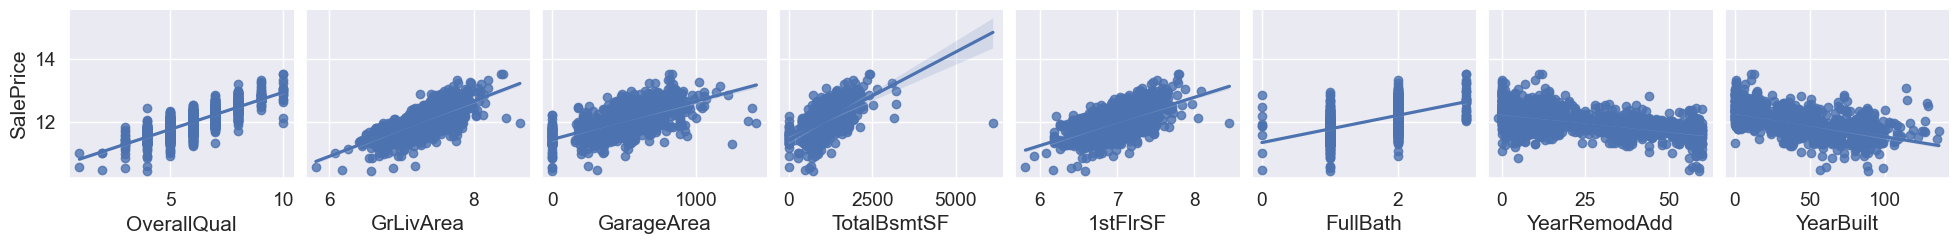

In [49]:
sns.pairplot(df_house, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )
plt.show()

OverallQual has hight corr with Sales Price.  

YearRemodAdd and YearBuilt as the year increases price also decreases

##### Checking the distirbution of the dependent variable

In [50]:
df_house['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

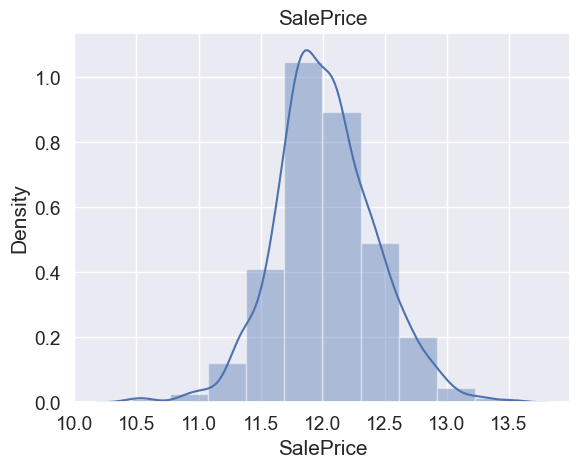

In [51]:
plt.title('SalePrice')
sns.distplot(df_house['SalePrice'], bins=10)
plt.show()

### Creating Dummy Variables

copying the datset into a new dataframe

In [52]:
df_house_new = df_house.copy()

Dropping the ID column

In [53]:
df_house_new.drop("Id",axis =1,inplace= True)

Creating Dummy variables 

In [54]:
categorical_col=[col for col in df_house_new.columns if df_house[col].dtypes=='O']

In [55]:
categorical_col

['MSZoning',
 'Neighborhood',
 'Condition2',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC']

In [56]:
df_house_new = pd.get_dummies(data = df_house_new, columns =df_house_new[categorical_col].columns, drop_first=True)

In [57]:
df_house_new.shape

(1460, 125)

In [58]:
df_house_new.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,LowQualFinSF,...,GarageFinish_Unf,GarageQual_None,GarageQual_Others,GarageQual_TA,GarageCond_None,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Others
0,60,9.041922,7,5,5,5,706,856,6.752270,0,...,0,0,0,1,0,0,1,0,1,0
1,20,9.169518,6,8,31,31,978,1262,7.140453,0,...,0,0,0,1,0,0,1,0,1,0
2,60,9.328123,7,5,7,6,486,920,6.824374,0,...,0,0,0,1,0,0,1,0,1,0
3,70,9.164296,7,5,91,36,216,756,6.867974,0,...,1,0,0,1,0,0,1,0,1,0
4,60,9.565214,8,5,8,8,655,1145,7.043160,0,...,0,0,0,1,0,0,1,0,1,0


## Model Building

Test Train split

In [59]:
house_train, house_test = train_test_split(df_house_new, train_size = 0.7, random_state=100)

In [60]:
print("Shape of train set: ", house_train.shape)
print("Shape of test set: ", house_test.shape)

Shape of train set:  (1021, 125)
Shape of test set:  (439, 125)


### Rescaling the continous variables

In [61]:
continuous = df_house_new.select_dtypes(include=['int64','float64'])
continuous_vars = continuous.columns
continuous_vars

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'Fireplaces', 'GarageYrBlt', 'GarageArea',
       '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

In [62]:
### Aplying MinMaxscalar
#feature_scale=[feature for feature in house_train[continuous_vars] ]
scaler=MinMaxScaler()
house_train[continuous_vars] = scaler.fit_transform(house_train[continuous_vars])
house_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,LowQualFinSF,...,GarageFinish_Unf,GarageQual_None,GarageQual_Others,GarageQual_TA,GarageCond_None,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Others
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.226306,0.362982,0.565894,0.572600,0.268364,0.390729,0.079406,0.173813,0.430773,0.011649,...,0.421156,0.055828,0.011753,0.900098,0.055828,0.011753,0.906954,0.020568,0.915769,0.003918
std,0.254701,0.104331,0.155515,0.136515,0.223133,0.337590,0.082409,0.075139,0.127445,0.093608,...,0.493986,0.229701,0.107826,0.300016,0.229701,0.107826,0.290639,0.142003,0.277870,0.062500
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.324798,0.444444,0.500000,0.058824,0.081967,0.000000,0.129787,0.337896,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.176471,0.373724,0.555556,0.500000,0.250000,0.245902,0.069454,0.162684,0.422675,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.294118,0.412179,0.666667,0.625000,0.397059,0.688525,0.126152,0.215057,0.529023,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#X_train , Y_train

In [63]:
y_train = house_train.pop("SalePrice")
X_train = house_train


In [64]:
y_train.shape


(1021,)

In [65]:
X_train.shape

(1021, 124)

#### Rescaling the test 

In [66]:

house_test[continuous_vars]  =  scaler.transform(house_test[continuous_vars])


In [67]:
house_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,LowQualFinSF,...,GarageFinish_Unf,GarageQual_None,GarageQual_Others,GarageQual_TA,GarageCond_None,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Others
count,439.000000,439.000000,439.000000,439.00000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.195498,0.366173,0.568211,0.57033,0.269597,0.397028,0.076739,0.171326,0.426468,0.010651,...,0.398633,0.054670,0.018223,0.892938,0.054670,0.013667,0.911162,0.020501,0.922551,0.006834
std,0.233458,0.102869,0.149440,0.14508,0.221030,0.340527,0.077027,0.063409,0.120428,0.096367,...,0.490176,0.227594,0.133910,0.309544,0.227594,0.116239,0.284835,0.141869,0.267607,0.082477
min,0.000000,-0.025623,0.000000,0.12500,0.000000,0.016393,0.000000,0.000000,-0.042511,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.332464,0.444444,0.50000,0.051471,0.081967,0.000000,0.133061,0.347681,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.176471,0.370960,0.555556,0.50000,0.257353,0.262295,0.063962,0.160884,0.423401,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.235294,0.415430,0.666667,0.62500,0.397059,0.704918,0.125177,0.204255,0.506031,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,0.939204,1.000000,1.00000,0.992647,1.000000,0.387668,0.413093,0.755392,1.110680,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
y_test = house_test.pop("SalePrice")
X_test = house_test


In [69]:
y_test.shape

(439,)

In [70]:
X_test.shape

(439, 124)

### Model Building

##### RFE

In [71]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(estimator=lr, n_features_to_select=60)
rfe.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9249015360044964
Testing R2
0.8671442346657293


In [72]:
y_LR_Pred = lr.predict(X_train)
print("R2 :", r2_score(y_train, y_LR_Pred))

RSS = np.sum(np.square(y_train - y_LR_Pred))
print("RSS :", RSS)

MSE = mean_squared_error(y_train, y_LR_Pred)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)



R2 : 0.9249015360044964
RSS : 1.2749191292238407
MSE : 0.0012486965026678165
RMSE : 0.035336900014967594


In [73]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 60 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df


,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,YearBuilt,True,1
4,YearRemodAdd,True,1
5,BsmtFinSF1,True,1
6,1stFlrSF,True,1
7,GrLivArea,True,1
8,GarageArea,True,1
9,PoolArea,True,1


In [74]:
X_train = X_train[col]
X_test  = X_test[col]


### Model Building and Evaluation 

### Ridge Regression

In [75]:
folds  = KFold(n_splits=10,shuffle=True,random_state=50)

#params = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

params = {'alpha': [
 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
# the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 0.5}


In [77]:
#fit the data to ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.14488982  0.13732082  0.10141716 -0.09320696 -0.0316075   0.01221899
  0.07571283  0.29425945  0.07026379  0.02049744 -0.08904517 -0.02928724
  0.02609832  0.03916762 -0.03067937 -0.02325749 -0.03007904 -0.01426306
 -0.01163622  0.05047933  0.02536292 -0.02211258 -0.01907754  0.02502049
  0.03895574 -0.03719901  0.03006462 -0.03443186 -0.00049305  0.01255889
  0.00946225  0.07037488  0.01158169 -0.03468922 -0.02972163 -0.03203251
 -0.03880525 -0.03203251 -0.01347386 -0.03203251 -0.01331564 -0.02533448
 -0.01314728  0.01423275 -0.03019849 -0.02180443 -0.02692854 -0.01409307
 -0.00948948 -0.02606015 -0.03562278 -0.01401058 -0.02673779 -0.00036188
 -0.02952603 -0.00036188 -0.00036188  0.00891341 -0.00036188 -0.10122997]


In [78]:
# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.5,-0.025851,-0.027752,1
1,0.6,-0.025890,-0.027772,2
2,0.7,-0.025929,-0.027798,3
3,0.8,-0.025971,-0.027829,4
4,0.9,-0.026015,-0.027861,5
5,1.0,-0.026061,-0.027894,6
6,2.0,-0.026614,-0.028334,7
7,3.0,-0.027221,-0.028876,8
8,4.0,-0.027851,-0.029453,9
9,5.0,-0.028463,-0.030033,10


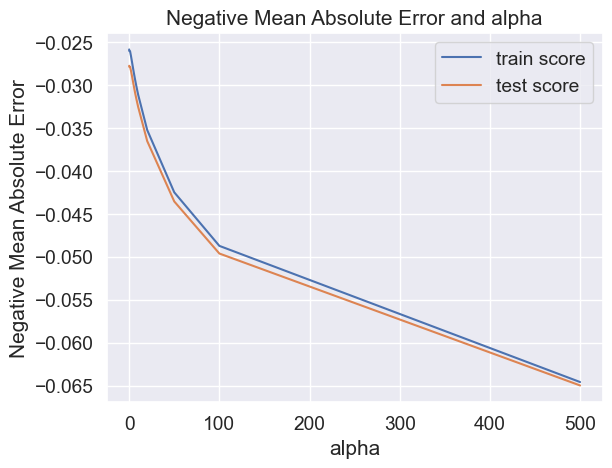

In [79]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [80]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False)

,Feaure,Coef
8,GarageArea,0.294259
0,LotArea,0.224854
1,OverallQual,0.144890
2,OverallCond,0.137321
3,YearBuilt,0.101417
7,GrLivArea,0.075713
32,ExterCond_TA,0.070375
9,PoolArea,0.070264
20,Neighborhood_NridgHt,0.050479
14,Neighborhood_Edwards,0.039168


### Lasso Regression

In [81]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8671524579909687
0.8510326349778817


In [82]:
# Using KFold for model valodation

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [84]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [85]:
lasso.coef_

array([ 1.51367661e-01,  1.54225440e-01,  1.01151712e-01, -9.82662706e-02,
       -3.19105206e-02,  0.00000000e+00,  7.21415468e-02,  3.00324689e-01,
        6.79849190e-02, -0.00000000e+00, -8.18936933e-02, -2.03191247e-02,
        2.21060086e-02,  3.67096565e-02, -2.80866891e-02, -1.95262959e-02,
       -1.48389881e-02, -8.84492786e-03, -9.95385566e-03,  4.59990955e-02,
        2.62678178e-02, -1.85737249e-02, -1.58508901e-02,  2.31918662e-02,
        3.43563482e-02, -2.79900351e-02,  2.77863922e-02, -2.18157622e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.23945694e-02,
        2.60009049e-03, -2.61733784e-02, -2.67317016e-02, -6.67562359e-02,
       -3.40568059e-02, -2.06387021e-02, -1.09517809e-02, -2.20688625e-04,
       -1.12348151e-02, -2.64537526e-02, -0.00000000e+00,  1.43051450e-02,
       -2.31824917e-02, -1.73993717e-02, -2.33683245e-02, -0.00000000e+00,
        6.46478310e-04, -1.56347576e-02, -1.83006764e-02, -3.06061478e-03,
       -1.69835974e-02, -

In [86]:
cv_result_lasso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
cv_result_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.013507,0.005771,0.005619,0.002639,0.0001,{'alpha': 0.0001},-0.027957,-0.031803,-0.027774,-0.021226,...,-0.026227,-0.026668,-0.026411,-0.025124,-0.026317,-0.025357,-0.025669,-0.026114,-0.025919,0.000478
1,0.006466,0.005975,0.002063,0.002250,0.0010,{'alpha': 0.001},-0.032177,-0.034692,-0.033325,-0.026534,...,-0.032933,-0.033549,-0.033029,-0.032208,-0.033192,-0.032211,-0.032596,-0.033073,-0.032822,0.000404
2,0.007761,0.002637,0.004604,0.002802,0.0100,{'alpha': 0.01},-0.075951,-0.066902,-0.063740,-0.059192,...,-0.067755,-0.067956,-0.067233,-0.067021,-0.067472,-0.066608,-0.066958,-0.067069,-0.067216,0.000406
3,0.007249,0.004709,0.002613,0.003516,0.1000,{'alpha': 0.1},-0.110293,-0.098074,-0.102323,-0.092521,...,-0.100734,-0.101732,-0.101174,-0.101987,-0.100459,-0.098981,-0.101706,-0.100873,-0.100880,0.000869
4,0.003094,0.003517,0.003116,0.004088,0.2000,{'alpha': 0.2},-0.110293,-0.098074,-0.102323,-0.092521,...,-0.100734,-0.101732,-0.101174,-0.101987,-0.100459,-0.098981,-0.101706,-0.100873,-0.100880,0.000869


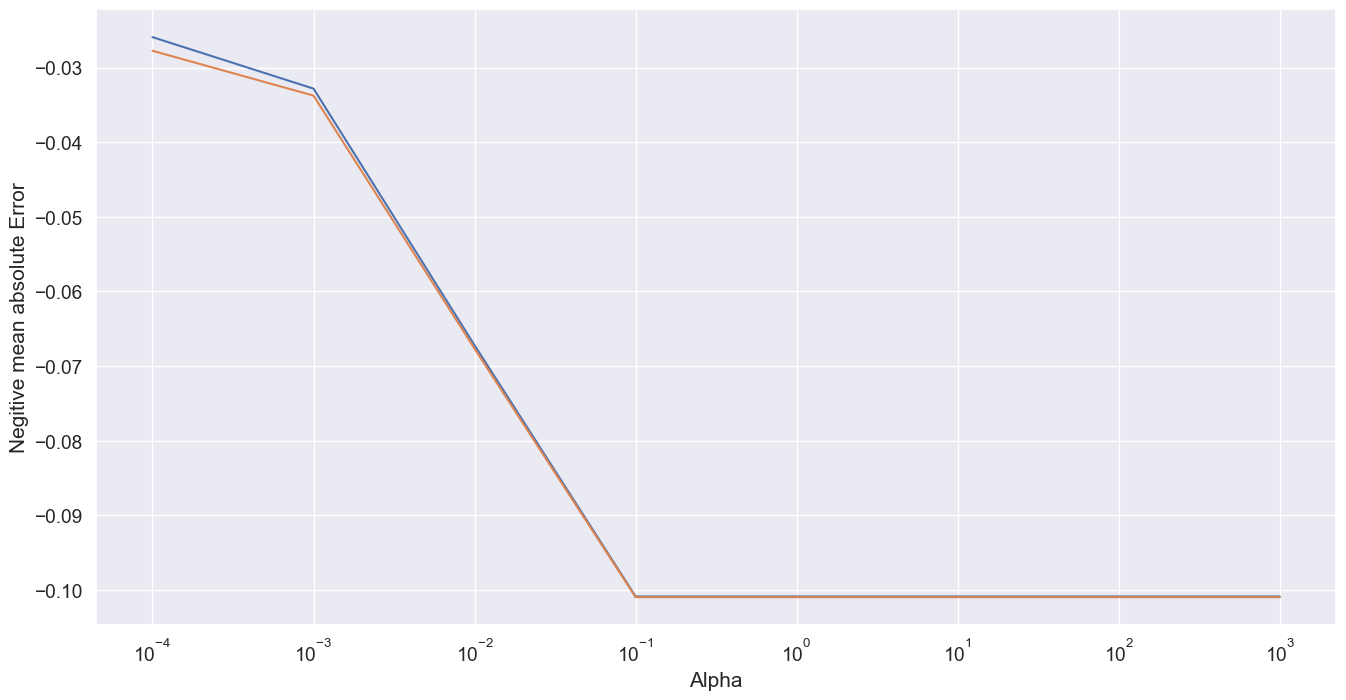

In [87]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [88]:
#checking for the alpha 0.0001
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9118858860272677
0.8818173650105583


In [89]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficient']
lasso_coef.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
8,GarageArea,0.300325
0,LotArea,0.204749
2,OverallCond,0.154225
1,OverallQual,0.151368
3,YearBuilt,0.101152
7,GrLivArea,0.072142
9,PoolArea,0.067985
20,Neighborhood_NridgHt,0.045999
14,Neighborhood_Edwards,0.036710
25,Condition2_Others,0.034356


## Final Conclusion

##### Optimal value for Aplha for Ridge and Lasso regression are 

Ridge: 0.5
    
Lasso :0.0001
    


##### Top 5 significant variables in predicting the price of a house :

1.OverallCond

2. YearBuilt

3.GarageArea

4.OverallQual

5.LotArea

6.OverallCond


# Part 2

### Question 1 

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important
predictor variables after the change is implemented?

##### Optimal value for Ridge - 0.5

Optimal value for Lasso - 0.0001

#### Double the values of alpha

Ridge - 0.10

Lasso - 0.0002

In [110]:
# Ridge regression
ridge = Ridge(alpha=0.10)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.49790889e-01  1.35831936e-01  1.06225173e-01 -9.90314090e-02
 -3.01127690e-02  1.74477833e-02  7.24244609e-02  3.08667159e-01
  6.95857604e-02  2.30073376e-01 -9.48827628e-02 -2.97553573e-02
  2.57780680e-02  3.91146378e-02 -3.05991442e-02 -2.11045664e-02
 -2.90434809e-02 -1.50803225e-02 -1.35389504e-02  4.90205680e-02
  2.51688670e-02 -2.19282486e-02 -1.92846451e-02  2.52409741e-02
  4.05019194e-02 -3.98770010e-02  3.05392006e-02 -3.65286365e-02
  2.76319468e-03  1.59461215e-02  1.18003277e-02  8.79511687e-02
  1.39452570e-02 -3.40841204e-02 -2.97652303e-02 -3.22004143e-02
 -3.81098393e-02 -3.22004143e-02 -1.41342328e-02 -3.22004143e-02
 -1.36668263e-02 -2.53255948e-02 -1.89568026e-02  1.31083784e-02
 -2.96835376e-02 -2.14868017e-02 -2.57430977e-02 -1.69118893e-02
 -1.14120877e-02 -2.68984127e-02 -3.74536011e-02 -1.61338841e-02
 -2.76809302e-02 -2.53167396e-04 -3.05370683e-02 -2.53167396e-04
 -2.53167396e-04  7.94497702e-03 -2.53167396e-04 -2.89404482e-01]


In [111]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train.columns

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False)

,Featuere,Coef
8,GarageArea,0.308667
10,MSZoning_Others,0.230073
0,LotArea,0.215935
1,OverallQual,0.149791
2,OverallCond,0.135832
3,YearBuilt,0.106225
32,ExterCond_TA,0.087951
7,GrLivArea,0.072424
9,PoolArea,0.069586
20,Neighborhood_NridgHt,0.049021


we have got ExterCond_TA , MSZoning_Others addiitonal 

In [112]:
lm = Lasso(alpha=0.0002)
lm.fit(X_train,y_train)

#r2 train
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9076441742437884
0.8832060987165818


In [113]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficient']
lasso_coef.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
8,GarageArea,0.300325
0,LotArea,0.204749
2,OverallCond,0.154225
1,OverallQual,0.151368
3,YearBuilt,0.101152
7,GrLivArea,0.072142
9,PoolArea,0.067985
20,Neighborhood_NridgHt,0.045999
14,Neighborhood_Edwards,0.036710
25,Condition2_Others,0.034356


#####  In Lasso , we see top 5 paramaters are same

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [114]:
col_toDrop = ["GarageArea", "LotArea", "OverallCond", "OverallQual", "YearBuilt"]
X_train_mod = X_train.copy()
X_test_mod = X_test.copy()

X_train_mod = X_train_mod.drop(col_toDrop,axis =1)
X_test_mod = X_test_mod.drop(col_toDrop,axis =1)

In [115]:

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_mod,y_train)

y_train_pred = lasso.predict(X_train_mod)
y_test_pred = lasso.predict(X_test_mod)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8816169866109128
0.8331438546484418


In [117]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_mod.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficient']
lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)

,Features,Coefficient
0,YearRemodAdd,0.375570
4,PoolArea,0.367102
3,GrLivArea,0.115294
27,ExterCond_TA,0.100422
15,Neighborhood_NridgHt,0.062020
2,1stFlrSF,0.043195
39,KitchenQual_Fa,0.035528
20,Condition2_Others,0.033157
16,Neighborhood_OldTown,0.033099
19,Neighborhood_StoneBr,0.027491


##### Five most important predictor  

1. YearRemodAdd.
2.PoolArea.
3. GrLivArea.
4.ExterCond_TA.
5.Neighborhood_NridgHt.
